# Proyecto 2: Ingeniería de Features, Modelos Avanzados e Interpretación de Modelos

# 1. IMPORTANDO LIBRERIAS Y DATASET

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error

In [3]:
# Cargamos el dataset
#data_prop = pd.read_csv('/content/drive/MyDrive/data science/DS_Proyecto_01_Datos_Properati.csv')
# Convertimos los datos en un dataframe de Pandas.
#df = pd.DataFrame(data_prop)

# 2. SOBRE EL DATASET

In [4]:
# Cargamos el dataset
data_prop = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
# Convertimos los datos en un dataframe de Pandas.
df = pd.DataFrame(data_prop)

## CONOCIENDO EL DATASET, SUS FEATURES Y RELACIONES

El dataset de properati contiene features cuya descripcion se muestra a continuacion:

- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- lat - Latitud.
- lon - Longitud.
- l1 - Nivel administrativo 1: país.
- l2 - Nivel administrativo 2: usualmente provincia.
- l3 - Nivel administrativo 3: usualmente ciudad.
- l4 - Nivel administrativo 4: usualmente barrio.
- rooms - Cantidad de ambientes (útil en Argentina).
- bedrooms - Cantidad de dormitorios (útil en el resto de los países).
- bathrooms - Cantidad de baños.
- surface_total - Superficie total en m².
- surface_covered - Superficie cubierta en m².
- price - Precio publicado en el anuncio.
- currency - Moneda del precio publicado.
- title - Título del anuncio.
- description - Descripción del anuncio.
- property_type - Tipo de propiedad (Casa, Departamento, PH).
- operation_type - Tipo de operación (Venta, Alquiler).

In [ ]:
# Visualizamos las primeras cinco instancias.
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [ ]:
# Conocemos la informacion del dataframe
# Tenemos 11 columnas categoricas y 8 columnas numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

In [ ]:
# Conocemos la dimensionalidad del dataset.Cuenta con 146.660 filas y 19 columnas
df.shape

(146660, 19)

In [ ]:
# Imprimimos en pantalla las columnas del dataset.
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

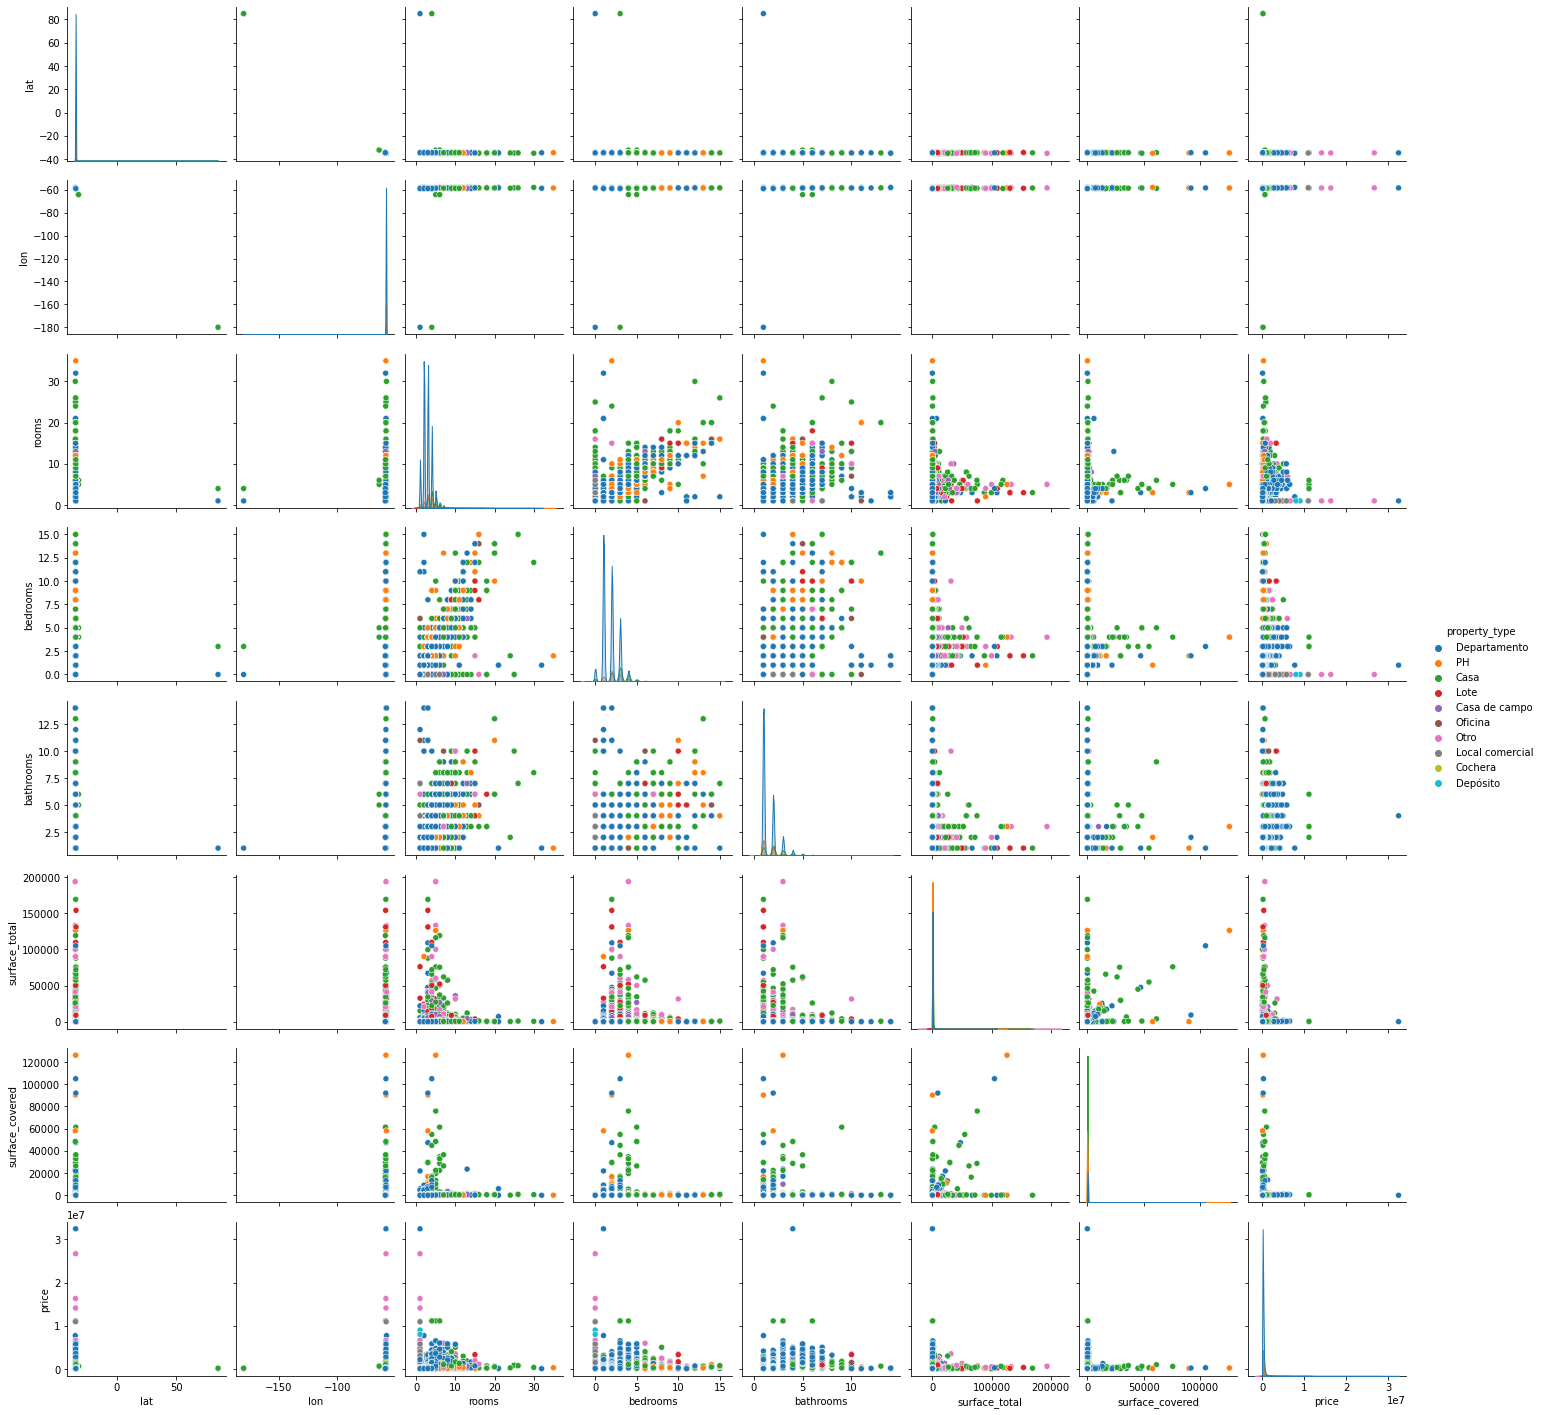

In [ ]:
# Visualizamos las relaciones entre variables con un pairplot
sns.pairplot(data = df, hue = 'property_type')
plt.show()

In [ ]:
# Describimos las estadisticas descriptivas del dataset
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.000000,136701.000000,146660.000000,146660.000000,140703.000000,126133.000000,125046.000000,1.466600e+05
mean,-34.604896,-58.465304,3.079817,1.983240,1.599994,216.872888,112.818011,2.412211e+05
std,0.468428,0.486190,1.416352,1.151304,0.889324,2037.606649,916.857584,3.185195e+05
min,-35.318457,-180.000000,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,-34.627667,-58.504012,2.000000,1.000000,1.000000,52.000000,47.000000,1.110000e+05
50%,-34.600943,-58.443262,3.000000,2.000000,1.000000,78.000000,68.000000,1.660000e+05
75%,-34.574600,-58.407586,4.000000,3.000000,2.000000,140.000000,108.000000,2.650000e+05
max,85.051129,-57.805832,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


In [ ]:
# Recontamos las instancias agrupados por tipo de propiedad 
df.groupby('property_type', sort = False).size()

property_type
Departamento       107326
PH                  14298
Casa                21521
Lote                 1312
Casa de campo         322
Oficina               658
Otro                  374
Local comercial       325
Cochera               259
Depósito              265
dtype: int64

Text(0.5, 0, 'Cantidad')

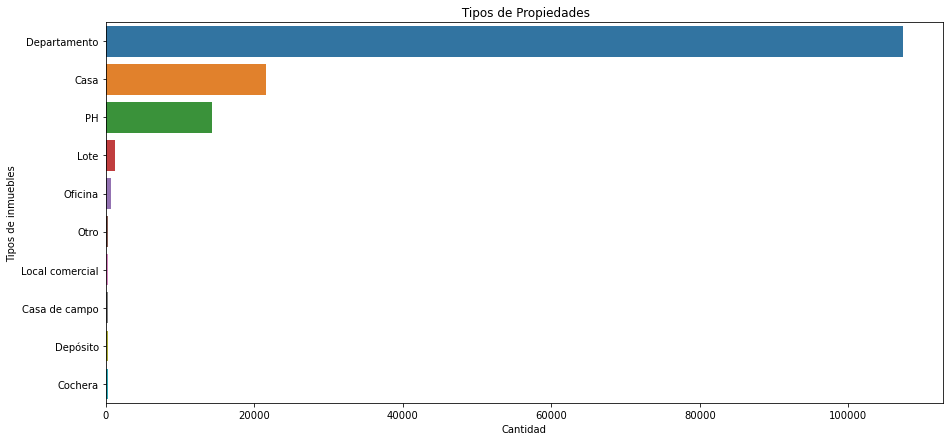

In [ ]:
# Graficamos las cantidades de los tipos de propiedades.
plt.figure(figsize = (15,7))
sns.countplot(data = df, y = "property_type",order = df['property_type'].value_counts(ascending=False).index)
plt.title(' Tipos de Propiedades')
plt.ylabel('Tipos de inmuebles')
plt.xlabel('Cantidad')

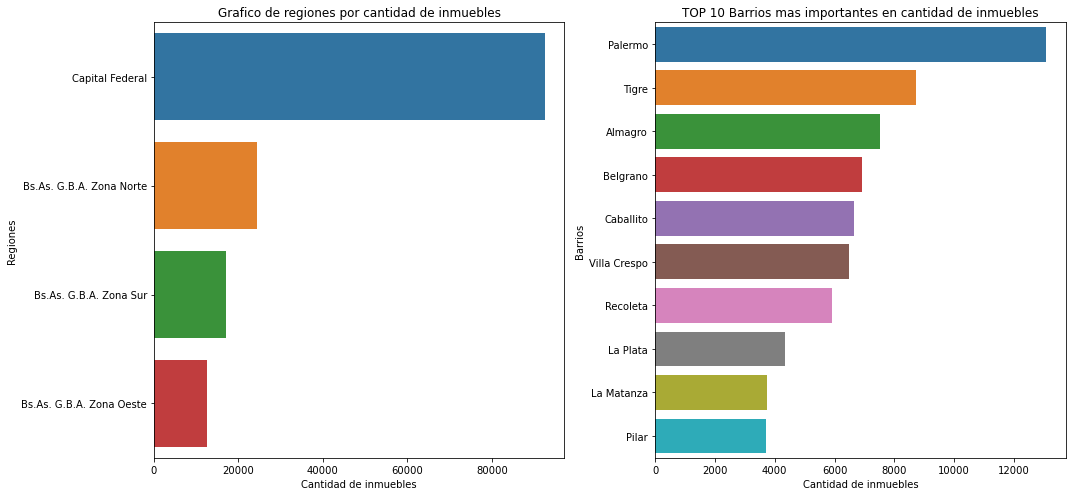

In [ ]:
#Grafico de regiones por cantidad de inmuebles y el Top 10 de barrios mas importantes por inmuebles
plt.figure(figsize = (15,7))

plt.subplot(1,2,1)
sns.countplot(data = df , y='l2', order = df['l2'].value_counts(ascending=False).index)
plt.title('Grafico de regiones por cantidad de inmuebles')
plt.ylabel('Regiones')
plt.xlabel('Cantidad de inmuebles')

plt.subplot(1,2,2)
sns.countplot(data = df , y='l3', order = df['l3'].value_counts(ascending=False).index[:10])
plt.title('TOP 10 Barrios mas importantes en cantidad de inmuebles')
plt.ylabel('Barrios')
plt.xlabel('Cantidad de inmuebles')

plt.tight_layout()
plt.show()


In [ ]:
#!pip install folium 
import folium

In [ ]:
# Graficamos en el mapa, donde se encuentra la media de ubicaciones del dataset.
data_folium = df.dropna() 
data_folium.isnull().sum()

m = folium.Map(location=[data_folium['lat'].mean(), data_folium['lon'].mean()])
tooltip = 'Click me!'

folium.Marker([data_folium['lat'].mean(), data_folium['lon'].mean()], tooltip=tooltip).add_to(m)

m

In [ ]:
# El siguiente codigo es a efectos de mostrar las variables cuantitativas y las variables cualitativas que tiene el datset.
var_cuant = [f for f in df.columns if df.dtypes[f] != 'object']
var_cual = [f for f in df.columns if df.dtypes[f] == 'object']

In [ ]:
# Variables cuantitativas
var_cuant

['lat',
 'lon',
 'rooms',
 'bedrooms',
 'bathrooms',
 'surface_total',
 'surface_covered',
 'price']

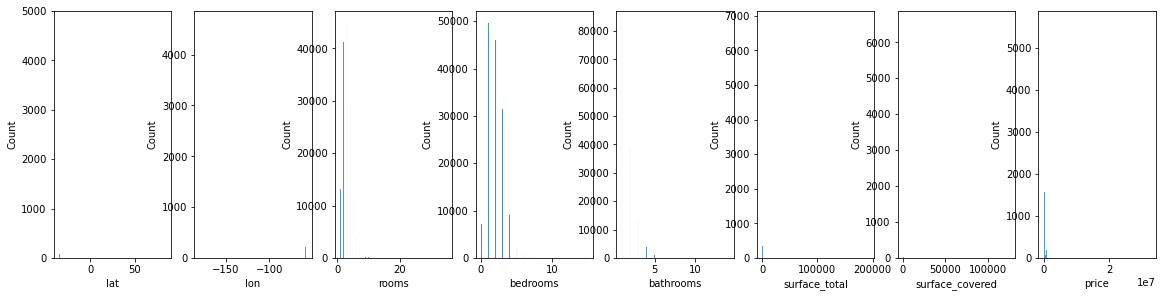

In [ ]:
plt.figure(figsize=(50,10))
for i,col in enumerate(var_cuant):
    plt.subplot(2,20,i+1)
    sns.histplot(df[col])

In [ ]:
# Variables cualitativas
var_cual

['start_date',
 'end_date',
 'created_on',
 'l1',
 'l2',
 'l3',
 'currency',
 'title',
 'description',
 'property_type',
 'operation_type']

In [ ]:
# Se visualiza la cantidad de valores faltantes por columnas.
print(df.isna().sum().sort_values(ascending=False))

surface_covered    21614
surface_total      20527
lon                 9959
lat                 9925
bathrooms           5957
start_date             0
property_type          0
description            0
title                  0
currency               0
price                  0
bedrooms               0
end_date               0
rooms                  0
l3                     0
l2                     0
l1                     0
created_on             0
operation_type         0
dtype: int64


<AxesSubplot:>

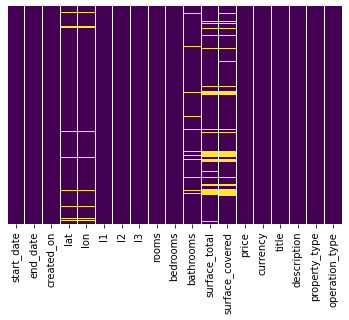

In [ ]:
# Grafico de correlacion de datos nulos
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

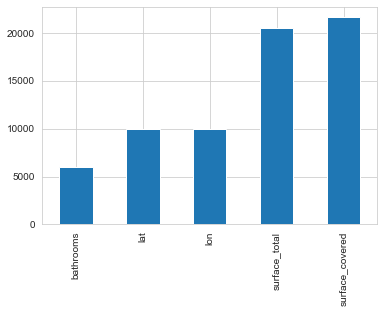

In [ ]:
# Graficamos para visualizar en forma ordenada los valores faltantes observando 
# que son solo en las columnas cuantitativas.
sns.set_style("whitegrid")
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

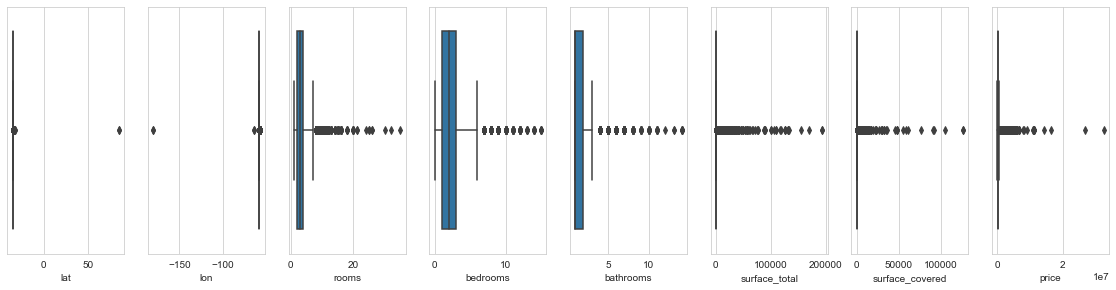

In [ ]:
# Graficamos las variables cuantitativas para ver si hay outliers.
plt.figure(figsize=(50,10))
for i,col in enumerate(var_cuant):
    plt.subplot(2,20,i+1)
    sns.boxplot(df[col])

In [ ]:
# Correlaciones de variables
co_relation=df.corr()
co_relation

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
lat,1.000000,-0.975578,-0.010933,0.007618,0.019923,-0.019598,-0.004156,0.013393
lon,-0.975578,1.000000,-0.006931,-0.016905,-0.028612,-0.049097,-0.014388,0.009368
rooms,-0.010933,-0.006931,1.000000,0.869769,0.613308,0.081044,0.075012,0.351025
bedrooms,0.007618,-0.016905,0.869769,1.000000,0.588527,0.079229,0.072627,0.316192
bathrooms,0.019923,-0.028612,0.613308,0.588527,1.000000,0.061159,0.069361,0.556861
surface_total,-0.019598,-0.049097,0.081044,0.079229,0.061159,1.000000,0.430887,0.038727
surface_covered,-0.004156,-0.014388,0.075012,0.072627,0.069361,0.430887,1.000000,0.049136
price,0.013393,0.009368,0.351025,0.316192,0.556861,0.038727,0.049136,1.000000


<AxesSubplot:>

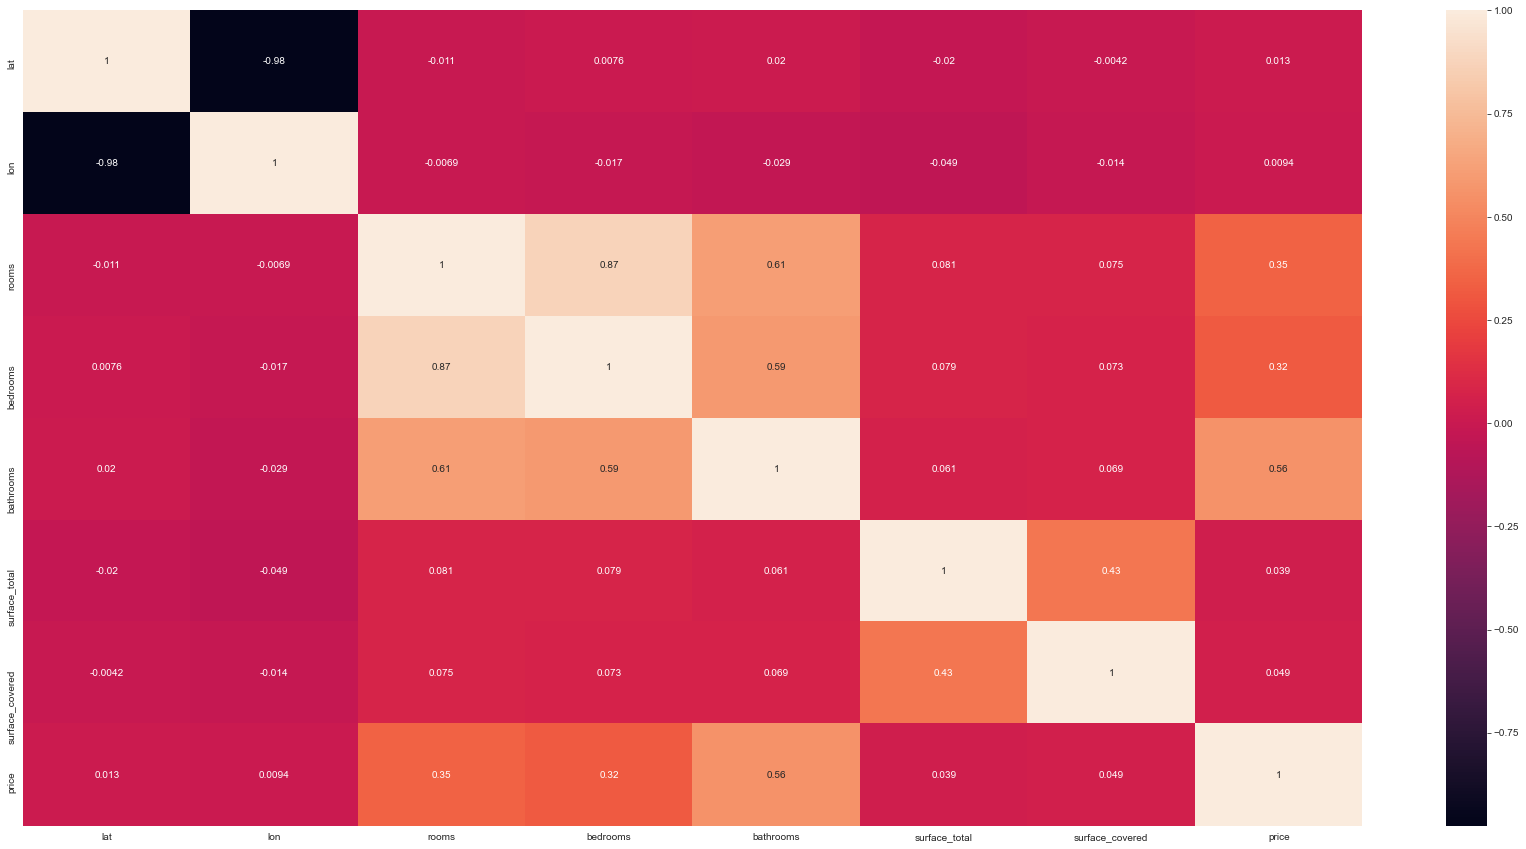

In [ ]:
# Mapa de calor de correlaciones de variables
plt.figure(figsize=(30,15))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}>

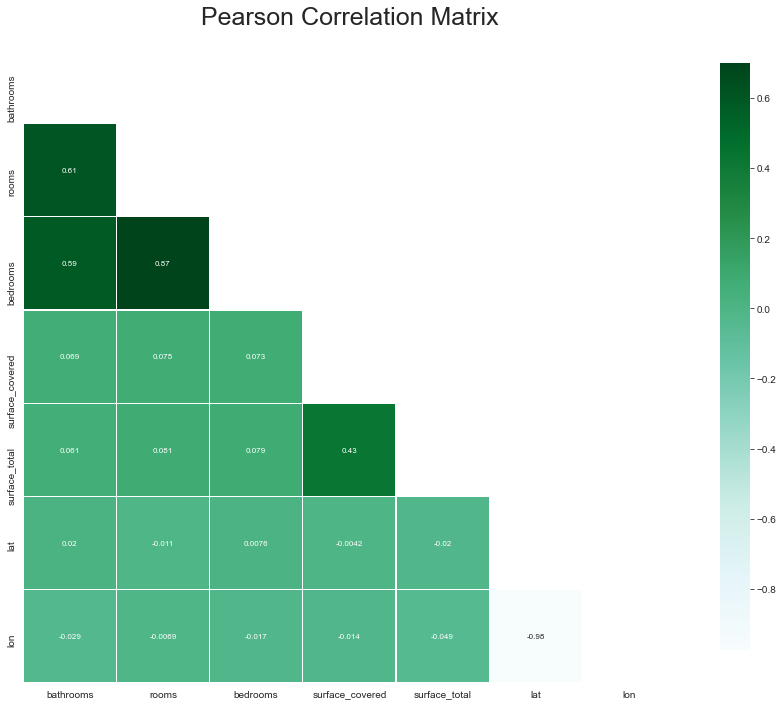

In [ ]:
# Otra manera de ver las correlaciones ordenadas
features = ['bathrooms','rooms', 'bedrooms', 'surface_covered', 'surface_total', 'lat','lon']
mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9})

In [ ]:
# Correlaciones con la variable precio
co_relation=df.corr()["price"]
co_relation

lat                0.013393
lon                0.009368
rooms              0.351025
bedrooms           0.316192
bathrooms          0.556861
surface_total      0.038727
surface_covered    0.049136
price              1.000000
Name: price, dtype: float64

In [ ]:
# Correlaciones con la variable precio, ordenadas de mayor a menor
co_relation.abs().sort_values(ascending=False)[1:]

bathrooms          0.556861
rooms              0.351025
bedrooms           0.316192
surface_covered    0.049136
surface_total      0.038727
lat                0.013393
lon                0.009368
Name: price, dtype: float64

# 3. PREPROCESAMIENTO DE DATOS

Antes de que podamos hacer cualquier ingeniería de features, necesitamos preprocesar los datos para obtenerlos en una forma adecuada para el análisis. Necesitaremos:
- Importar Librerias
- Cargar los datos de archivos CSV
- Limpiar los datos para corregir errores o inconsistencias
- Codificar el tipo de datos estadísticos (numéricos, categóricos)
- Imputar los valores faltantes
- Corregir los outliers
- Aplicar encoding de variables categoricas
- Normalizar los datos
- Reduccion de dimensionalidad

In [ ]:
# Cargamos el dataset nuevamente
data_prop = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
# Convertimos los datos en un dataframe de Pandas.
df = pd.DataFrame(data_prop)

In [ ]:
# Primero comenzamos eliminando las columnas que no aportan informacion para el modelo
dfg=df.copy()
dfg.drop(["start_date","end_date","created_on","lat","lon", 'title', 'operation_type','currency','l1','description'],axis=1,inplace=True)

In [ ]:
# Visualizamos las 5 primeras filas del dataset a procesar.
dfg.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,PH


- #### Separamos entre variables categoricas y numericas.

In [ ]:
# Variables categoricas
df_cat=dfg.select_dtypes(object)
df_cat.head()

,l2,l3,property_type
0,Capital Federal,San Cristobal,Departamento
1,Capital Federal,Boedo,PH
2,Capital Federal,Palermo,PH
3,Capital Federal,Palermo,PH
4,Bs.As. G.B.A. Zona Sur,La Plata,PH


In [ ]:
# Variables numericas
df_num=dfg.select_dtypes(np.number)
df_num.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
4,2.0,1.0,1.0,50.0,35.0,40000.0


## 1- IMPUTACION DE VALORES FALTANTES

In [ ]:
# Valores nulos del datset
dfg.isnull().sum()

l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64

In [ ]:
# Valores nulos ordenados
dfg.isna().sum()/dfg.shape[0]*100

l2                  0.000000
l3                  0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           4.061776
surface_total      13.996318
surface_covered    14.737488
price               0.000000
property_type       0.000000
dtype: float64

In [ ]:
# Procedemos a aplicar KNNImputer a fin de imputar valores faltantes en el dataset.
from sklearn.impute import KNNImputer
imputer = KNNImputer()

# entrenando sobre el dataset
imputer.fit(df_num)

# transformando el dataset
df_num_impute = pd.DataFrame(imputer.transform(df_num),columns=df_num.columns)

In [ ]:
# Verificamos si existen valores faltantes
df_num_impute.isna().sum()

rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

In [ ]:
# Concatenamos las variables numericas y categoricas sin valores nulos
d=pd.concat([df_cat,df_num_impute],axis=1)

In [ ]:
# Chequeando valores nulos
d.isna().sum()

l2                 0
l3                 0
property_type      0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

In [ ]:
# Descripcion estadistica del dataset sin valores nulos
d.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,146660.000000,146660.000000,146660.000000,146660.000000,146660.000000,1.466600e+05
mean,3.079817,1.983240,1.599370,219.794957,111.365820,2.412211e+05
std,1.416352,1.151304,0.886715,1977.893322,857.083116,3.185195e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,5.500000e+03
25%,2.000000,1.000000,1.000000,51.000000,46.000000,1.110000e+05
50%,3.000000,2.000000,1.000000,79.000000,67.000000,1.660000e+05
75%,4.000000,3.000000,2.000000,143.000000,108.000000,2.650000e+05
max,35.000000,15.000000,14.000000,193549.000000,126062.000000,3.243423e+07


## 2 - DETECCION Y ELIMINACION DE OUTLIERS

### 1. Rango Intercuartílico
- Las variables, como vimos, no se distribuyen normalmente. Por ello, utilizaremos el criterio del Rango Intercuartílico para descarcartar a los valores atípicos.

<AxesSubplot:xlabel='price', ylabel='Density'>

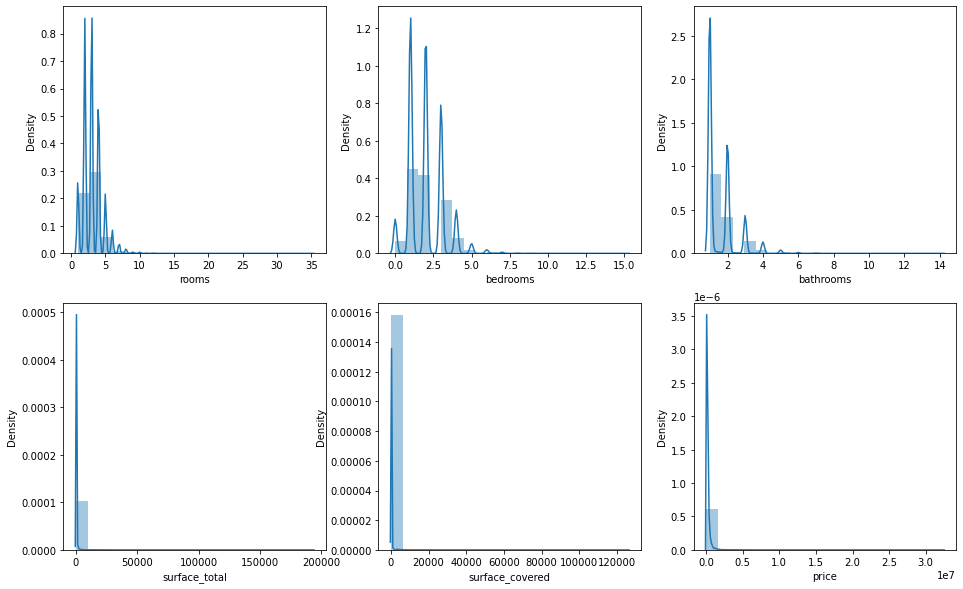

In [ ]:
# Graficamos para visualizar los valores atipicos.
# Visualizamos la distribución de las variables numéricas

plt.figure(figsize=(16,10))

plt.subplot(2, 3, 1)
sns.distplot(d['rooms'], bins = 20)

plt.subplot(2, 3, 2)
sns.distplot(d['bedrooms'], bins = 20)

plt.subplot(2, 3, 3)
sns.distplot(d['bathrooms'], bins = 20)

plt.subplot(2, 3, 4)
sns.distplot(d['surface_total'], bins = 20)

plt.subplot(2, 3, 5)
sns.distplot(d['surface_covered'], bins = 20)

plt.subplot(2, 3, 6)
sns.distplot(d['price'], bins = 20)


In [ ]:
# removiendo outliers mediante el criterio del rango intercuartilico.
q1 = d.quantile(0.25)
q3 = d.quantile(0.75)
IQR = q3-q1
IQR

d = d[~((d) > (q3 + (1.5 * IQR))).any(axis=1)]

In [ ]:
# Descripcion estadistica del dataset sin outliers
d.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,121028.000000,121028.000000,121028.000000,121028.000000,121028.000000,121028.000000
mean,2.753297,1.742473,1.376728,82.317840,67.997011,175339.066125
std,1.056322,0.921912,0.582898,47.959686,33.138490,92860.106185
min,1.000000,0.000000,1.000000,10.000000,1.000000,6000.000000
25%,2.000000,1.000000,1.000000,48.000000,44.000000,105000.000000
50%,3.000000,2.000000,1.000000,68.000000,60.000000,150000.000000
75%,3.000000,2.000000,2.000000,100.000000,83.000000,225000.000000
max,7.000000,6.000000,3.400000,281.000000,201.000000,496000.000000


<AxesSubplot:xlabel='price', ylabel='Density'>

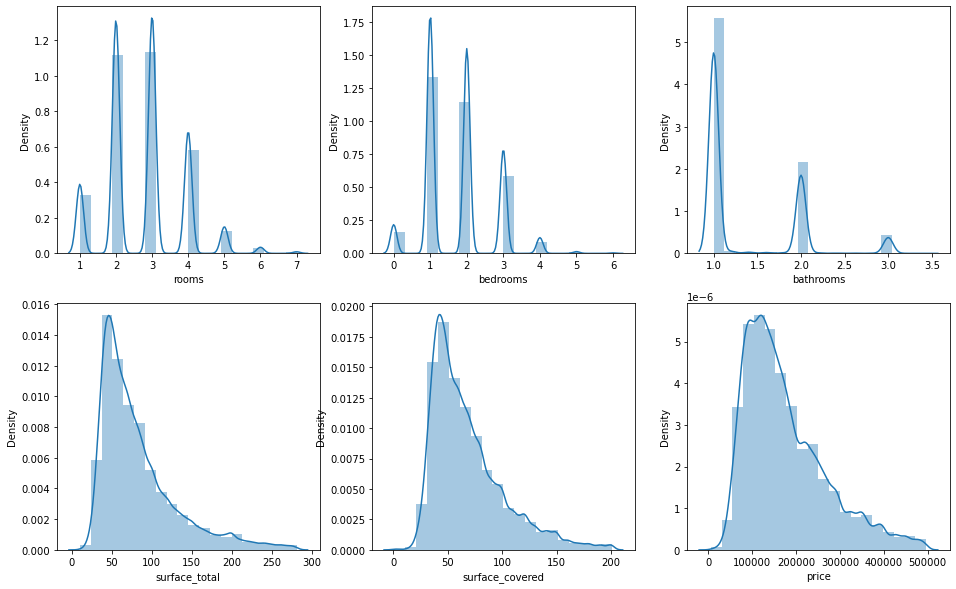

In [ ]:
# Grafica de caja sin outliers
# Graficamos para visualizar los valores atipicos.
# Visualizamos la distribución de las variables numéricas

plt.figure(figsize=(16,10))

plt.subplot(2, 3, 1)
sns.distplot(d['rooms'], bins = 20)

plt.subplot(2, 3, 2)
sns.distplot(d['bedrooms'], bins = 20)

plt.subplot(2, 3, 3)
sns.distplot(d['bathrooms'], bins = 20)

plt.subplot(2, 3, 4)
sns.distplot(d['surface_total'], bins = 20)

plt.subplot(2, 3, 5)
sns.distplot(d['surface_covered'], bins = 20)

plt.subplot(2, 3, 6)
sns.distplot(d['price'], bins = 20)


In [ ]:
# Ajustando los valores de Superficie cubierta ya que no puede ser mayor a superficie total.
d['surface_covered'] = np.where(d['surface_covered'] > d['surface_total'], d['surface_total'], d['surface_covered'])

In [ ]:
# Chequeamos que no hayan valores de superficie cubierta mayor a total.
d.loc[(d['surface_covered'] > d['surface_total'])]

,l2,l3,property_type,rooms,bedrooms,bathrooms,surface_total,surface_covered,price


#### Visualizamos las relaciones entre variables con un pairplot


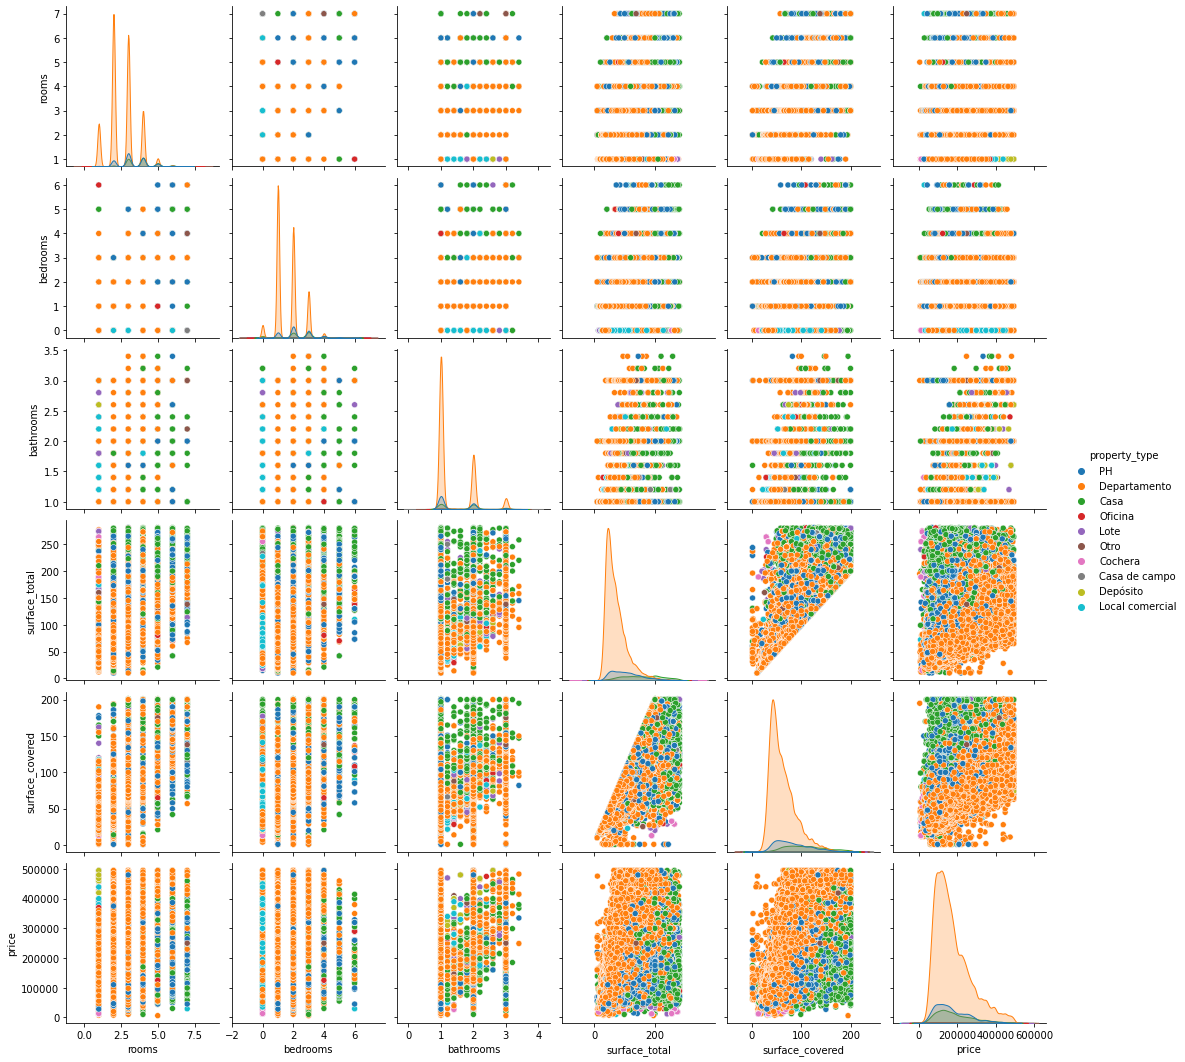

In [ ]:
# Visualizamos las relaciones entre las variables
sns.pairplot(data = d, hue = 'property_type') 
plt.show()

## 3 - ESCALADO DE DATOS

Necesitamos escalar nuestras variables independientes para poder llevarlas a la misma unidad de medida y evitar que el modelo interprete que hay variables que tienen más importancia que las demas.

Utilizaremos la técnica de Z-score que transforma a todas las variables en términos de la desviación estándar.

In [ ]:
# Separamos las variables categoricas
data_cat=d.select_dtypes(object).reset_index()

In [ ]:
data_cat.head()

,index,l2,l3,property_type
0,1,Capital Federal,Boedo,PH
1,2,Capital Federal,Palermo,PH
2,3,Capital Federal,Palermo,PH
3,4,Bs.As. G.B.A. Zona Sur,La Plata,PH
4,5,Capital Federal,Villa Crespo,PH


In [ ]:
# Separamos las variables numericas a escalar
data_num=d.select_dtypes(np.number).reset_index()

In [ ]:
data_num.head()

,index,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,1,2.0,1.0,2.0,70.0,58.0,159000.0
1,2,2.0,1.0,1.0,45.0,45.0,125000.0
2,3,2.0,1.0,1.0,85.0,50.0,295000.0
3,4,2.0,1.0,1.0,50.0,35.0,40000.0
4,5,2.0,1.0,1.0,56.0,56.0,150000.0


In [ ]:
# Extraemos el precio de las variables a escalar.
data_num=data_num.drop(['price'], axis = 1)

In [ ]:
# Aplicamos el metodo de escalado StandardScaler.
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data_num_scaled=pd.DataFrame(ss.fit_transform(data_num),columns=data_num.columns)

In [ ]:
# Visualizamos los datos escalados
data_num_scaled.head()

,index,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,-1.728032,-0.713135,-0.805366,1.069269,-0.256838,-0.293415
1,-1.728008,-0.713135,-0.805366,-0.646304,-0.778112,-0.689400
2,-1.727984,-0.713135,-0.805366,-0.646304,0.055926,-0.537098
3,-1.727961,-0.713135,-0.805366,-0.646304,-0.673857,-0.994004
4,-1.727937,-0.713135,-0.805366,-0.646304,-0.548751,-0.354336


In [ ]:
# Concatenamos las variables numericas escaladas con las variables categoricas.
data_scaled=pd.concat([data_num_scaled,data_cat, d.price.reset_index()],axis=1).drop('index',axis=1)
data_scaled.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,l2,l3,property_type,price
0,-0.713135,-0.805366,1.069269,-0.256838,-0.293415,Capital Federal,Boedo,PH,159000.0
1,-0.713135,-0.805366,-0.646304,-0.778112,-0.689400,Capital Federal,Palermo,PH,125000.0
2,-0.713135,-0.805366,-0.646304,0.055926,-0.537098,Capital Federal,Palermo,PH,295000.0
3,-0.713135,-0.805366,-0.646304,-0.673857,-0.994004,Bs.As. G.B.A. Zona Sur,La Plata,PH,40000.0
4,-0.713135,-0.805366,-0.646304,-0.548751,-0.354336,Capital Federal,Villa Crespo,PH,150000.0


In [ ]:
# Descripcion estadistica del dataset escalado
data_scaled.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,1.210280e+05,1.210280e+05,1.210280e+05,1.210280e+05,1.210280e+05,121028.000000
mean,8.641958e-17,4.696716e-17,-1.164786e-16,1.014491e-16,5.485765e-16,175339.066125
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,92860.106185
min,-1.659819e+00,-1.890073e+00,-6.463038e-01,-1.507894e+00,-2.029657e+00,6000.000000
25%,-7.131346e-01,-8.053656e-01,-6.463038e-01,-7.155589e-01,-7.442288e-01,105000.000000
50%,2.335502e-01,2.793416e-01,-6.463038e-01,-2.985403e-01,-2.507705e-01,150000.000000
75%,2.335502e-01,2.793416e-01,1.069269e+00,3.686895e-01,4.376342e-01,225000.000000
max,4.020289e+00,4.618170e+00,3.471071e+00,4.142708e+00,4.062420e+00,496000.000000


## 4 - ENCODING

Analizamos la posibilidad de agregar los atributos categóricos a nuestro set de variables predictoras.

Las variables categóricas son:

- l2
- l3
- property_type

Utilizaremos en este trabajo:

- One-Hot Encoding: crea una variable dummy por cada posible valor de la variable categórica.

In [ ]:
data_encoded_scaled=pd.get_dummies(data_scaled,columns=['property_type', 'l2', 'l3'], drop_first = True)
data_encoded_scaled.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
0,-0.713135,-0.805366,1.069269,-0.256838,-0.293415,159000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.713135,-0.805366,-0.646304,-0.778112,-0.689400,125000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.713135,-0.805366,-0.646304,0.055926,-0.537098,295000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.713135,-0.805366,-0.646304,-0.673857,-0.994004,40000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.713135,-0.805366,-0.646304,-0.548751,-0.354336,150000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_encoded_scaled.to_csv('data_encoded_scaled.csv',index=False)

## 5 - GENERACION DE NUEVAS VARIABLES PREDICTORAS/REDUCCION DE LA DIMENSIONALIDAD (SVD/PCA)

In [ ]:
# Procedemos a guardar en una nueva variable para aplicar PCA
d2 = data_encoded_scaled.drop(['price'], axis=1)

In [ ]:
d2.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type_Casa de campo,property_type_Cochera,property_type_Departamento,property_type_Depósito,property_type_Local comercial,...,l3_Villa Lugano,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque
0,-0.713135,-0.805366,1.069269,-0.256838,-0.293415,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.713135,-0.805366,-0.646304,-0.778112,-0.689400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.713135,-0.805366,-0.646304,0.055926,-0.537098,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.713135,-0.805366,-0.646304,-0.673857,-0.994004,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.713135,-0.805366,-0.646304,-0.548751,-0.354336,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Importando la libreria
from sklearn.decomposition import PCA

Text(0, 0.5, 'varianza explicada acumulada')

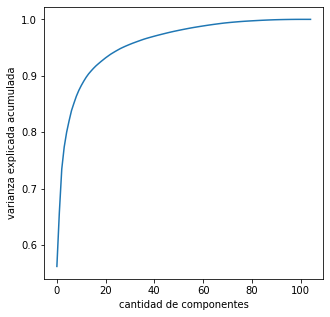

In [ ]:
# Aplicamos el modelo de reduccion de dimensionalidad PCA y graficamos la varianza explicada acumulada por cada componente.
pcaex = PCA().fit(d2)
# GRAFICA
fig = plt.figure(figsize = (5,5))
plt.plot(np.cumsum(pcaex.explained_variance_ratio_))
plt.xlabel('cantidad de componentes')
plt.ylabel('varianza explicada acumulada')

In [ ]:
print(np.cumsum(pcaex.explained_variance_ratio_*100))

[ 56.23288898  65.70025508  73.47749998  77.38067858  80.00932793
  82.01813735  83.84400102  85.15858702  86.39937191  87.41779311
  88.27583348  89.03957537  89.73961707  90.33983872  90.84418074
  91.31897023  91.75190745  92.13250518  92.49863798  92.8476511
  93.19182125  93.50288311  93.8118872   94.07800163  94.33568768
  94.58055143  94.81992455  95.02611954  95.22430245  95.40749466
  95.58682532  95.75967217  95.91928091  96.07871301  96.23342066
  96.38733837  96.53110088  96.66161182  96.78446112  96.90538752
  97.02375852  97.1397449   97.24980708  97.35926628  97.46691611
  97.57371652  97.6774583   97.77855092  97.87448308  97.96558563
  98.05603694  98.14457624  98.23047513  98.3144799   98.39808024
  98.47794807  98.55429126  98.62627693  98.6967865   98.76649837
  98.83378042  98.90037989  98.96570623  99.02766409  99.08930226
  99.14749877  99.20436314  99.26022045  99.31537658  99.36487047
  99.40842382  99.45078165  99.49033331  99.52749134  99.56342953
  99.598624

In [ ]:
# Utilizaremos 2 componentes para explicar la varianza de las features.
pca_eval = PCA(0.90).fit(d2)
pca_eval.n_components_

14

In [ ]:
# Componentes del modelo
pca_eval.components_

array([[ 4.72103544e-01,  4.56136546e-01,  3.58125494e-01, ...,
         1.00019928e-04, -2.69157367e-03,  1.23059660e-05],
       [-2.58492525e-01, -2.82411657e-01,  8.99012437e-01, ...,
        -5.40334983e-04,  3.30792322e-03, -2.96591247e-03],
       [-3.20136903e-01, -4.93249082e-01, -1.21099540e-01, ...,
        -1.92719125e-04, -7.86042622e-03, -3.62554286e-03],
       ...,
       [-2.13600194e-02,  1.34218577e-02,  1.43799601e-02, ...,
        -1.86048443e-04, -1.68050470e-02, -4.99845072e-03],
       [ 1.13154947e-02,  2.14713273e-03, -7.39223065e-03, ...,
         4.31991325e-04,  5.19022026e-02,  1.30077216e-02],
       [ 3.07141947e-03,  5.44987743e-03,  1.02213035e-02, ...,
         5.63384102e-04,  1.14708405e-01,  2.00905563e-02]])

In [ ]:
# Ratio de varianza que explican los primeros dos componentes
pca_eval.explained_variance_ratio_

array([0.56232889, 0.09467366, 0.07777245, 0.03903179, 0.02628649,
       0.02008809, 0.01825864, 0.01314586, 0.01240785, 0.01018421,
       0.0085804 , 0.00763742, 0.00700042, 0.00600222])

In [ ]:
pca = PCA(n_components=pca_eval.n_components_, random_state=5)
pca = pca.fit_transform(d2)

In [ ]:
X_pca = pd.DataFrame(pca)

In [ ]:
X_pca.shape

(121028, 14)

In [ ]:
X_pca.to_csv('X_pca.csv',index=False)

### Mediante la clusterizacion de K-means intentaremos visualizar los componentes de PCA

In [ ]:
pca2=PCA(n_components=2)
pca2.fit_transform(d2)

print(pca2.explained_variance_ratio_*100)

[56.23288898  9.46736609]


In [ ]:
components = pca2.components_.T
pd.DataFrame(components,index=d2.columns,columns=['PC1','PC2'])

,PC1,PC2
rooms,0.472104,-0.258493
bedrooms,0.456137,-0.282412
bathrooms,0.358125,0.899012
surface_total,0.447309,-0.106233
surface_covered,0.483094,-0.021381
...,...,...
l3_Villa Riachuelo,0.000052,-0.000189
l3_Villa Santa Rita,-0.000109,-0.001220
l3_Villa Soldati,0.000100,-0.000540
l3_Villa Urquiza,-0.002692,0.003308


In [ ]:
data_pca=pd.DataFrame(pca2.transform(d2),columns=['PC1','PC2'])
data_pca

,PC1,PC2
0,-0.496972,1.220335
1,-1.541395,-0.244155
2,-1.094746,-0.336014
3,-1.609251,-0.316381
4,-1.276100,-0.294554
...,...,...
121023,-1.488753,-0.089853
121024,2.648804,0.110332
121025,-2.168530,0.203148
121026,-1.789373,-0.016935


In [ ]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2,random_state=10)
cluster_kmeans=model.fit_predict(data_pca)

In [ ]:
#cluster_kmeans=model.fit_predict(data_pca).reshape(-1,1)

In [ ]:
data_pca['km_cluster_pca']=cluster_kmeans

In [ ]:
data_pca

,PC1,PC2,km_cluster_pca
0,-0.496972,1.220335,0
1,-1.541395,-0.244155,0
2,-1.094746,-0.336014,0
3,-1.609251,-0.316381,0
4,-1.276100,-0.294554,0
...,...,...,...
121023,-1.488753,-0.089853,0
121024,2.648804,0.110332,1
121025,-2.168530,0.203148,0
121026,-1.789373,-0.016935,0


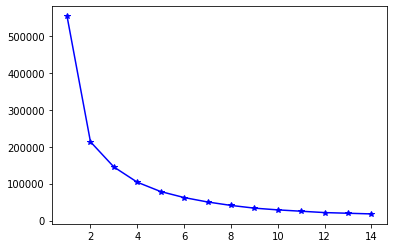

In [ ]:
# Utilizamos la tecnica del codo para visualzar la cantidad de clusters a aplicar
ssd = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(data_pca)
    ssd.append(kmeans.inertia_)

plt.plot(range(1,15),ssd,marker='*',color='b')
plt.show()

In [ ]:
print(ssd)

[553971.752654439, 213563.33349108536, 145257.44225620644, 103873.10422358412, 78546.68860090448, 62324.88268184547, 50339.79727054108, 40982.78343901886, 33588.84132413292, 28874.2535362582, 25211.350341426267, 21549.986506218578, 19715.190153132447, 17922.598623099282]


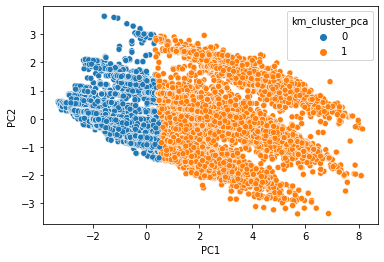

In [ ]:
sns.scatterplot(x=data_pca['PC1'],y=data_pca['PC2'],hue=data_pca['km_cluster_pca'])

Podemos observar una correlacion inversa y 3 grupos de clusters.

# 4. MODELOS BENCHMARK Y COMPARATIVA SPRINT 1

## ENTRENAMOS UN ARBOL DE DECISION REGRESION

In [94]:
# Cargando la data preprocesada
data_encoded_scaled = pd.read_csv('data_encoded_scaled.csv')
X_pca = pd.read_csv('X_pca.csv')
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

In [95]:
# Para entrenar el modelo del Sprint 1 utilizaremos los datos escalados del dataset
X = data_encoded_scaled.drop(columns = ['price'])
y = data_encoded_scaled['price']

In [96]:
# Separamos en train, test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [97]:
# Importamos el arbol de decision regresion e instanciamos los objetos para cada modelo, 
# de base utilizamos una profundidad del arbol de 5.

from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
# Entrenamos el modelo
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [98]:
# Evaluando con cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(tree_regressor, X, y, cv=5)

array([0.62133202, 0.62931254, 0.61324817, 0.59934297, 0.5614688 ])

In [99]:
# Generamos la variable predictora para entrenamiento y testeo del arbol de desicion regresion

y_train_pred_tree = tree_regressor.predict(X_train)

y_test_pred_tree = tree_regressor.predict(X_test)

In [100]:
# Calculamos el valor del error cuadratico medio en train
from sklearn.metrics import mean_squared_error

rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_tree}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_tree}')

Raíz del error cuadrático medio en Train: 57249.5854838046
Raíz del error cuadrático medio en Test: 57595.736611665445


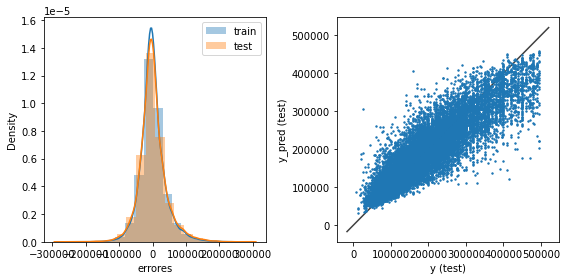

In [101]:
# Realizamos una visualizacion en paralelo del grafico de dispersion del error y 
#la grafica entre el valor predicho y el valor testeado

plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Text(0, 0.5, 'RMSE')

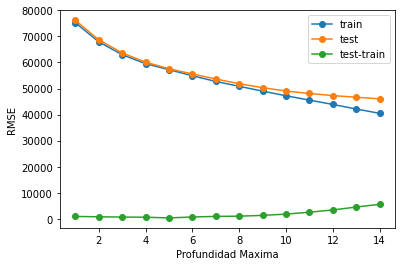

In [102]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []
lista_accuracy_dif = []

# Definimos la lista de valores de k que vamos a explorar
max_depths = range(1,15)

# Generamos en loop sobre los distintos valores de k 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    Dtr = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    
    # Entrenar el modelo
    Dtr.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = Dtr.predict(X_train)
    train_acc = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = Dtr.predict(X_test)
    test_acc = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)
    lista_accuracy_dif.append(test_acc-train_acc)
    
# Graficamos a fin de visualizar los mejores hiperparametros:

plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.plot(max_depths,lista_accuracy_dif,'o-',label='test-train')
plt.legend()
plt.xlabel('Profundidad Maxima')
plt.ylabel('RMSE')

- CONSIDERO QUE EL MODELO DE RANDOM FOREST ES UN BUEN BENCHMARK, A PARTIR DE AQUI COMENZAR A MEJORAR EL PERFORMANCE DE LOS MODELOS.

## ENTRENAMOS UN VECINOS MAS CERCANOS REGRESION

In [103]:
# Importando Libreria
from sklearn.neighbors import KNeighborsRegressor

In [104]:
# Separamos en train, test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [105]:
knn_regressor = KNeighborsRegressor(leaf_size = 15, metric= 'minkowski', n_neighbors= 90, weights='distance')

In [106]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=15, n_neighbors=90, weights='distance')

In [107]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_regressor, X, y, cv=5)

array([0.84795409, 0.86126313, 0.84086056, 0.81610497, 0.84619162])

In [108]:
y_train_pred_knn = knn_regressor.predict(X_train)

y_test_pred_knn = knn_regressor.predict(X_test)

In [109]:
from sklearn.metrics import mean_squared_error
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_knn}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_knn}')

Raíz del error cuadrático medio en Train: 13304.653493954318
Raíz del error cuadrático medio en Test: 35553.99880913695


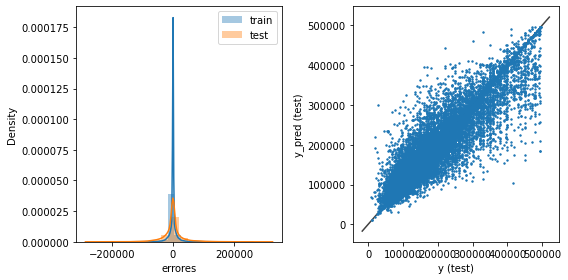

In [110]:
# Realizamos una visualizacion en paralelo del grafico de dispersion del error y 
#la grafica entre el valor predicho y el valor testeado

plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_knn, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_knn, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_knn, s =2)    
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Podemos visualizar que con KNN el modelo se encuentra overfitteado.

## ENTRENAMOS UNA REGRESION LINEA CON PCA

In [111]:
# Separamos en train, test.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, data_encoded_scaled.price, test_size=0.20, random_state=42)

In [112]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)

In [113]:
from sklearn.metrics import mean_squared_error
y_train_pred_PCA = linear_model.predict(X_train)
y_test_pred_PCA = linear_model.predict(X_test)
    
rmse_train_PCA = np.sqrt(mean_squared_error(y_train, y_train_pred_PCA))
rmse_test_PCA = np.sqrt(mean_squared_error(y_test, y_test_pred_PCA))

print('Raíz del error cuadrático medio en Train:',f'{rmse_train_PCA:,.0f}'.replace(',','.'))
print('Raíz del error cuadrático medio en Test:',f'{rmse_test_PCA:,.0f}'.replace(',','.'))

Raíz del error cuadrático medio en Train: 58.057
Raíz del error cuadrático medio en Test: 58.439


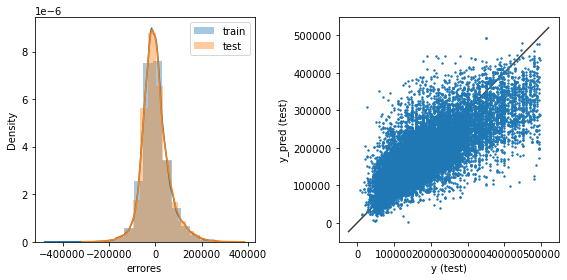

In [114]:
# Realizamos una visualizacion en paralelo del grafico de dispersion del error y 
#la grafica entre el valor predicho y el valor testeado

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_PCA, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_PCA, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_PCA, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [115]:
# Guardamos los errores en un csv
nombre=['rmse_train_tree', 'rmse_train_tree', 'rmse_train_knn', 'rmse_test_knn', 'rmse_train_PCA', 'rmse_test_PCA']
valor = [rmse_train_tree,rmse_train_tree,rmse_train_knn,rmse_test_knn,rmse_train_PCA,rmse_test_PCA ]

dicc= {'rmse':nombre,'value':valor}
errores_sp1 = pd.DataFrame(dicc)
errores_sp1.to_csv('errores_sp1.csv', index = False)

In [116]:
# Evaluamos con cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [117]:
# no presenta variabilidad en la separacion de datos
list(np.sqrt(scores*(-1)))

[58940.47527282112,
 57806.55927053028,
 57984.386703063836,
 58013.71977804116,
 57611.00886571777]

EL MODELO ANTERIOR DE REGRESION CON PCA, ES A MODO DE PRUEBA Y CONSIDERO QUE NO OBTUVIMOS UN BUEN RESULTADO, AUN LUEGO DE PREPROCESAR LOS DATOS CON PCA.

## Evaluando el desempeño
- El arbol de decision con las transformaciones realizadas, se puede visualizar que el error cuadratico medio es significativamente inferior al encontrado en el sprint 1, ya que se se escalaron los datos, se implementaron tecnicas de deteccion y eliminacion de outliers mediante el uso de los rangos intercuartilicos, se imputaron los valores faltantes mediante KNN Imputer para encontrar los valores similares, y se procedio a realizar encoding de las variables categoricas. Por lo cual utilizaremos como benchmark, cabe aclarar que el modelo de KNN produjo overfitting y la regresion lineal aun con PCA, obtuvo un menor performance.

# 5. MODELOS AVANZADOS

In [9]:
# Utilizare una funcion que me devuelva el tiempo que se tarda el modelo para entrenar.
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [11]:
#data_encoded_scaled = pd.read_csv('/content/drive/MyDrive/data science/data_encoded_scaled.csv')
#X_pca = pd.read_csv('/content/drive/MyDrive/data science/X_pca.csv')
#X = pd.read_csv('/content/drive/MyDrive/data science/X.csv')
#y = pd.read_csv('/content/drive/MyDrive/data science/y.csv')

In [12]:
data_encoded_scaled = pd.read_csv('data_encoded_scaled.csv')
X_pca = pd.read_csv('X_pca.csv')
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

## 1- APLICAMOS LOS ATRIBUTOS POLINOMICOS POR DEFECTO AL DATASET, Y LE PASAMOS ESOS DATOS A UN MODELO DE REGRESION LINEAL

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
poly = PolynomialFeatures()

X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

In [20]:
print(X_train_new.shape, X_test_new.shape)

(96822, 5671) (24206, 5671)


In [21]:
from sklearn.linear_model import LinearRegression

lrp = LinearRegression().fit(X_train_new, y_train)

In [22]:
y_train_pred = lrp.predict(X_train_new)
y_test_pred = lrp.predict(X_test_new)

In [23]:
from sklearn.metrics import mean_squared_error

rmse_train_poly2 = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_poly2 = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Raíz del error cuadrático medio en Train:',f'{rmse_train_poly2:,.0f}'.replace(',','.'))
print('Raíz del error cuadrático medio en Test:',f'{rmse_test_poly2:,.0f}'.replace(',','.'))

Raíz del error cuadrático medio en Train: 43.988
Raíz del error cuadrático medio en Test: 150.445.508.484


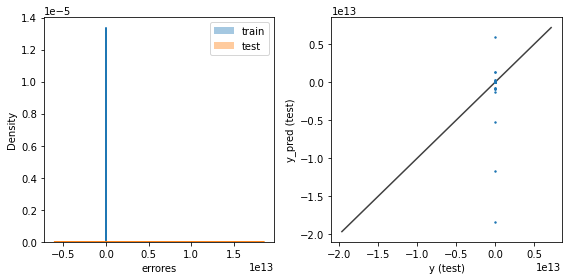

In [24]:
       
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [25]:
nombre=['rmse_train_poly2', 'rmse_test_poly2']
valor = [rmse_train_poly2,rmse_test_poly2]

dicc= {'rmse':nombre,'value':valor}
errores_poly2 = pd.DataFrame(dicc)
errores_poly2.to_csv('errores_poly2.csv', index = False)

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lrp, X_train_new, y_train, scoring='neg_mean_squared_error', cv=5)

In [27]:
list(np.sqrt(scores*(-1)))

[115590410576194.97,
 5086026009215.722,
 6084848340597.567,
 4423200950559.0625,
 18817918382714.215]

- PODEMOS VISUALIZAR QUE EN RESULTADO RMSE EN TEST ES MUY ALTO, EN COMPARACION CON EL DE TRAIN, CONCLUYENDO QUE ESTA MUY OVERFITTEADO EL MODELO, YA QUE ES MUY FLEXIBLE, POR LO QUE DEBEMOS ENCONTRAR UNA MANERA DE REGULARIZAR LOS FEATURES.

## 2- APLICAMOS REGULARIZACION USANDO EL DATASET TRANFORMADO CON POLINOMIAL FEATURES 

### Entrenamos una regresion lineal con regularizacion Ridge

In [30]:
# Utilizaremos la regularizacion de Ridge.
from sklearn.linear_model import Ridge

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
print(X_train_new.shape, X_test_new.shape)

(96822, 5671) (24206, 5671)


In [33]:
reg_ridge = Ridge()
reg_ridge.fit(X_train_new,y_train)

Ridge()

In [34]:
print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [    0.         -5958.21179056 -1894.78827119 ... 15861.57779274
     0.          5790.54158579]
Ordenada: 137336.05296745355


In [35]:
y_train_pred_ridge = reg_ridge.predict(X_train_new)
y_test_pred_ridge = reg_ridge.predict(X_test_new)

In [36]:
from sklearn.metrics import mean_squared_error

rmse_train_pridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_pridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_pridge}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_pridge}')

Raíz del error cuadrático medio en Train: 44021.82810559908
Raíz del error cuadrático medio en Test: 44790.41329125175


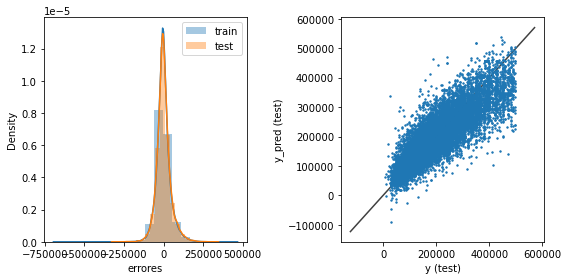

In [37]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_ridge, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_ridge, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_ridge, s =2)

lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  
        np.max([ax.get_xlim(), ax.get_ylim()]),]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

In [38]:
nombre=['rmse_train_pridge', 'rmse_test_pridge']
valor = [rmse_train_pridge,rmse_test_pridge]

dicc= {'rmse':nombre,'value':valor}
errores_ridge = pd.DataFrame(dicc)
errores_ridge.to_csv('errores_ridge.csv', index = False)

- Podemos visualizar que con la regularizacion de ridge, mejoro significativamente el modelo con respecto al modelo de regresion lineal con features polinomicas, castigando las variables que no aportan informacion y agregan flexibilidad al modelo

### Entrenamos una regresion lineal con regularizacion Lasso

In [39]:
from sklearn.linear_model import Lasso

In [40]:
reg_lasso = Lasso()
reg_lasso.fit(X_train_new,y_train)

Lasso()

In [41]:
print(X_train_new.shape, X_test_new.shape)

(96822, 5671) (24206, 5671)


In [42]:
print(reg_lasso.coef_, reg_lasso.intercept_)

[    0.         19686.54086154  3651.78558653 ...  1830.76793089
     0.          1839.04128069] 132410.6325376088


In [43]:
y_train_pred_lasso = reg_lasso.predict(X_train_new)
y_test_pred_lasso = reg_lasso.predict(X_test_new)

In [44]:
rmse_train_plasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_plasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

print(f'Raíz del error cuadrático medio en Train: {rmse_train_plasso}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_plasso}')

Raíz del error cuadrático medio en Train: 44103.11841031621
Raíz del error cuadrático medio en Test: 44797.01208640988


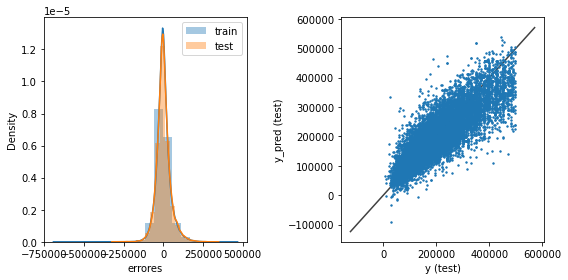

In [46]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_lasso, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_lasso, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_lasso, s = 2)

lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  
        np.max([ax.get_xlim(), ax.get_ylim()]),]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

In [47]:
nombre=['rmse_train_plasso', 'rmse_test_plasso']
valor = [rmse_train_plasso,rmse_test_plasso]

dicc= {'rmse':nombre,'value':valor}
errores_plasso = pd.DataFrame(dicc)
errores_plasso.to_csv('errores_plasso.csv', index = False)

- Podemos visualizar que practicamente es el mismo RMSE, de este modelo Lasso, que con la aplicacion de regluarizacion ridge.

## 3- ENTRENAMOS UN RANDOM FOREST REGRESSOR

### 1 - Primero entrenamos un RANDOM FOREST REGRESSOR con sus hiperparametros por default.

In [48]:
# Separamos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [49]:
# Entrenaremos un Random Forest Regressor con sus hiperparametros por defecto.
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

In [50]:
# Entrenamos
regr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Ordeno las features más importantes
thresholds = sorted(regr.feature_importances_, reverse=True)

In [ ]:
# Utilizamos un Metatransformador para seleccionar las features basadas en pesos de importancia
for thresh in thresholds:
    # seleccionar características usando el umbral
    selection = SelectFromModel(regr, threshold=thresh, prefit=True)
    
    select_X_train = selection.transform(X_train)
    
    # train model
    selection_model = RandomForestRegressor(random_state=5)
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(X_test)
    
    y_pred = selection_model.predict(select_X_test)
    
    predictions = [round(value) for value in y_pred]
    MSE = np.sqrt(mean_squared_error(y_test, predictions))
    print("Thresh=%.2f, n=%d" % (thresh, select_X_train.shape[1]), 'MSE:',f'{MSE:,.0f}'.replace(',','.'))

Thresh=0.36, n=1 MSE: 67.380
Thresh=0.23, n=2 MSE: 62.275
Thresh=0.13, n=3 MSE: 54.739
Thresh=0.04, n=4 MSE: 50.376
Thresh=0.03, n=5 MSE: 48.245
Thresh=0.02, n=6 MSE: 45.731
Thresh=0.02, n=7 MSE: 44.449
Thresh=0.02, n=8 MSE: 43.732
Thresh=0.01, n=9 MSE: 43.140
Thresh=0.01, n=10 MSE: 42.340
Thresh=0.01, n=11 MSE: 41.184
Thresh=0.01, n=12 MSE: 40.316
Thresh=0.01, n=13 MSE: 39.643
Thresh=0.01, n=14 MSE: 38.858
Thresh=0.01, n=15 MSE: 38.593
Thresh=0.01, n=16 MSE: 38.246
Thresh=0.01, n=17 MSE: 37.820
Thresh=0.00, n=18 MSE: 37.753
Thresh=0.00, n=19 MSE: 37.268
Thresh=0.00, n=20 MSE: 36.945
Thresh=0.00, n=21 MSE: 36.883
Thresh=0.00, n=22 MSE: 36.634
Thresh=0.00, n=23 MSE: 36.586
Thresh=0.00, n=24 MSE: 36.337
Thresh=0.00, n=25 MSE: 36.120
Thresh=0.00, n=26 MSE: 36.081
Thresh=0.00, n=27 MSE: 35.987
Thresh=0.00, n=28 MSE: 35.851
Thresh=0.00, n=29 MSE: 35.732
Thresh=0.00, n=30 MSE: 35.655
Thresh=0.00, n=31 MSE: 35.567
Thresh=0.00, n=32 MSE: 35.480
Thresh=0.00, n=33 MSE: 35.390
Thresh=0.00, n=34 M

Text(0, 0.5, 'Feature')

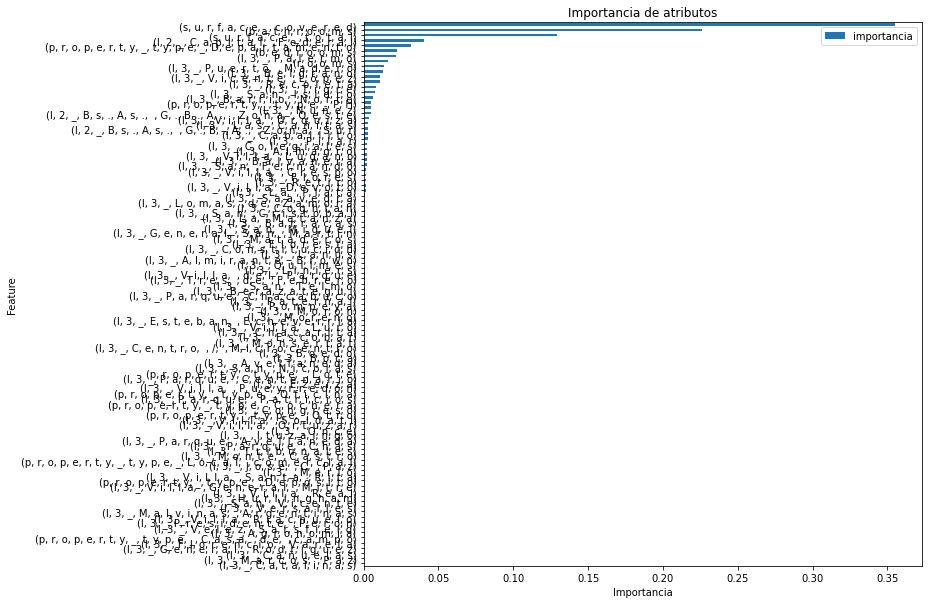

In [ ]:
# Genero un dataframe con las features y su importancia
atributos = X

feat_imp = pd.DataFrame({'Atributo':atributos,'importancia':regr.feature_importances_}).sort_values('importancia',ascending=False)

# Grafico los features mas importantes.
g = feat_imp.sort_values('importancia',ascending=True).plot(kind='barh', x='Atributo', figsize=(10,10))
plt.title('Importancia de atributos')
plt.xlabel('Importancia')
plt.ylabel('Feature')

In [ ]:
# Importancia de cada atributo ordenada de mayor a menor
var_mas_imp=feat_imp[:18].copy()
var_mas_imp

,Atributo,importancia
4,"(s, u, r, f, a, c, e, _, c, o, v, e, r, e, d)",0.355037
2,"(b, a, t, h, r, o, o, m, s)",0.226263
3,"(s, u, r, f, a, c, e, _, t, o, t, a, l)",0.129284
16,"(l, 2, _, C, a, p, i, t, a, l, , F, e, d, e, ...",0.040659
7,"(p, r, o, p, e, r, t, y, _, t, y, p, e, _, D, ...",0.031685
1,"(b, e, d, r, o, o, m, s)",0.022386
64,"(l, 3, _, P, a, l, e, r, m, o)",0.021805
0,"(r, o, o, m, s)",0.016271
74,"(l, 3, _, P, u, e, r, t, o, , M, a, d, e, r, o)",0.013690
24,"(l, 3, _, B, e, l, g, r, a, n, o)",0.012713


In [51]:
y_train_forest = regr.predict(X_train)
y_test_pred_forest = regr.predict(X_test)

In [52]:
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_pred_forest))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_forest}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_forest}')

Raíz del error cuadrático medio en Train: 17552.051119605065
Raíz del error cuadrático medio en Test: 34256.77272799283


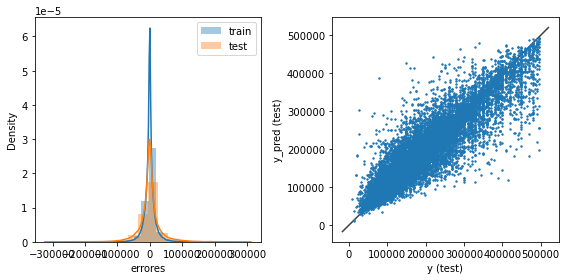

In [54]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_forest, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_forest, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_forest, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

In [55]:
nombre=['rmse_train_forest', 'rmse_test_forest']
valor = [rmse_train_forest,rmse_test_forest]

dicc= {'rmse':nombre,'value':valor}
errores_forest = pd.DataFrame(dicc)
errores_forest.to_csv('errores_forest.csv', index = False)

Podemos visualizar que segun la metrica utilizada RMSE en Train obtiene una buena metrica pero no asi en Test, por lo que no generaliza bien al estar overfitteado, con sus hiperparametros por defecto. Podria sea en parte por el hiperparametro max depth ya que por defecto llega hasta la hoja pura y eso provoca overfitting.

### 2 - Analizamos el modelo de RANDOM FOREST REGRESSOR con optimizacion de hiperparametros:


#### 2.1 Optimizando hiperparametros con RandomizedSearchCV.


In [56]:
# Separamos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [57]:
#El pprintmódulo proporciona la capacidad de "imprimir de forma bonita" 
#estructuras de datos de Python arbitrarias en una forma que se puede utilizar como entrada para el intérprete. 
from pprint import pprint

In [20]:
# Creando el random grid
from sklearn.model_selection import RandomizedSearchCV

# Numero de arboles
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 3)]
# Numero de features a considerar en cada split
max_features = ['auto', 'sqrt']
# Maximo numero de niveles en el arbol
max_depth = [int(x) for x in np.linspace(10, 10, num = 11)]
max_depth.append(None)
# Minimo numero de samples requerido para dividir a un nodo
min_samples_split = [2, 5, 10]
# Minimo numero de samples requerido para cada nodo hoja
min_samples_leaf = [1, 2, 4]
# metodo de seleccion de muestras
bootstrap = [True, False]

# Creando el random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 250, 300]}


In [ ]:
# Utilizo la random grid para buscar los mejores hiperparámetros
# Primero creo el modelo base para ajustar
rf = RandomForestRegressor(random_state = 42)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 20, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

In [22]:
# Entrenando
#rf_random.fit(X_train, y_train);

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [23]:
#Obtengo los mejores hiperparametros
rf_random.best_params_

{'n_estimators': 250,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [24]:
scores = pd.DataFrame(rf_random.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,361.467518,0.821359,5.256315,0.017635,250,5,1,auto,None,True,...,-22936.389042,-22802.074360,-22830.526227,77.478813,1,-12990.738123,-12927.446789,-12920.364067,-12946.182993,31.637646
1,195.736077,2.054429,1.393206,0.013384,250,5,4,auto,10,True,...,-33239.329554,-33165.286588,-33236.894553,57.499359,4,-32347.674597,-31944.394728,-32109.058459,-32133.709261,165.558468
2,33.678236,0.152036,1.246651,0.012076,250,10,2,sqrt,10,False,...,-38503.291768,-38146.806114,-38266.231095,167.628801,15,-38008.259510,-37890.219719,-37932.701042,-37943.726757,48.816137
3,227.601699,0.568177,1.136022,0.004428,200,5,1,auto,10,False,...,-34601.540397,-34514.783605,-34593.525762,61.283342,7,-33340.981948,-32912.168464,-33038.092075,-33097.080829,179.962970
4,227.260720,0.989179,1.127835,0.021042,200,10,4,auto,10,False,...,-34618.548780,-34496.944651,-34598.813798,76.404219,11,-33529.518070,-33116.311475,-33243.570511,-33296.466685,172.787782
5,341.185712,1.632988,1.679301,0.018676,300,5,2,auto,10,False,...,-34615.429621,-34469.239000,-34576.939842,77.181832,6,-33379.002988,-32975.141308,-33079.617801,-33144.587365,171.156551
6,25.038260,0.051051,1.204203,0.011786,250,2,4,sqrt,10,True,...,-38673.931738,-38419.959190,-38490.012562,131.274724,19,-38295.017913,-38152.582947,-38291.696444,-38246.432435,66.375461
7,76.115100,0.306512,4.983588,0.020204,250,10,1,sqrt,None,True,...,-24628.088901,-24567.342701,-24558.366685,60.923909,2,-18713.485776,-18582.759421,-18656.598179,-18650.947792,53.518160
8,335.490465,0.547927,1.676627,0.022733,300,10,4,auto,10,False,...,-34618.571557,-34496.681202,-34598.755444,76.546781,9,-33529.518070,-33116.311475,-33243.570511,-33296.466685,172.787782
9,192.709512,0.160976,1.388192,0.002281,250,5,4,auto,10,True,...,-33239.329554,-33165.286588,-33236.894553,57.499359,4,-32347.674597,-31944.394728,-32109.058459,-32133.709261,165.558468


In [58]:
# Evaluamos el modelo con los hiperparametros encontrados con random search cv.
rf_random = RandomForestRegressor(n_estimators= 250, min_samples_split = 5, min_samples_leaf = 1,
 max_features = 'auto', max_depth = None, bootstrap = True , random_state=42).fit(X_train,y_train)

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_random, X, y, cv=10, scoring='neg_mean_absolute_error')

In [60]:
y_train_forestran = rf_random.predict(X_train)
y_test_pred_forestran = rf_random.predict(X_test)

Raíz del error cuadrático medio en Train: 20088.770117940345
Raíz del error cuadrático medio en Test: 34496.82292534363


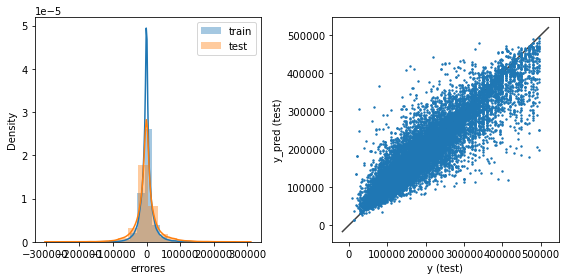

In [62]:
rmse_train_forestran = np.sqrt(mean_squared_error(y_train, y_train_forestran))
rmse_test_forestran = np.sqrt(mean_squared_error(y_test, y_test_pred_forestran))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_forestran}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_forestran}')

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_forestran, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_forestran, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_forestran, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

In [67]:
nombre=['rmse_train_forestran', 'rmse_test_forestran']
valor = [rmse_train_forestran,rmse_test_forestran]

dicc= {'rmse':nombre,'value':valor}
errores_forestran = pd.DataFrame(dicc)
errores_forestran.to_csv('errores_forestran.csv', index = False)

 #### 2.1 Optimizando hiperparametros con GridSearchCV.

In [62]:
parameters = {'n_estimators': [100, 300],
              'max_depth': [None, 1,2],                   
              'min_samples_leaf': [1,2],               
              'min_samples_split': [3, 5],              
                                        }
#Propios del Bosque Aleatorio:
#n_estimators: número de árboles que va a tener el bosque aleatorio. Normalmente cuantos más mejor, pero a partir de cierto punto deja de mejorar y sólo hace que vaya más lento.
#n_jobs: número de cores que se pueden usar para entrenar los árboles. Cada árbol es independiente del resto, así que entrenar un bosque aleatorio es una tarea muy paralelizable. 
#max_features: usa forma de garantizar que los árboles son diferentes, es que todos se entrenan con una muestra aleatoria de los datos. 
#Si queremos que todavía sean más diferentes, podemos hacer que distintos árboles usen distintos atributos. 
#Esto puede ser útil especialmente cuando algunos atributos están relacionados entre sí. 
#Regularización:
#max_depth: la profundidad máxima del árbol. En los ejemplos anteriores hemos usado max_depth = 2
#min_samples_split: número mínimo de muestras necesarias antes de dividir este nodo. También se puede expresar en porcentaje.
#min_samples_leaf: número mínimo de muestras que debe haber en un nodo final (hoja). También se puede expresar en porcentaje.
#max_leaf_nodes: número máximo de nodos finales
rfr = RandomForestRegressor(random_state=42)

grid = GridSearchCV(rfr, parameters, scoring='neg_mean_squared_error', n_jobs=-1)

In [63]:
#grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 1, 2], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [3, 5],
                         'n_estimators': [100, 300]},
             scoring='neg_mean_squared_error')

In [64]:
print(grid.best_params_)
print(-grid.best_score_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
1300091117.7516506


In [65]:
print("Mejores parametros: "+str(grid.best_params_))
print("Mejor Score: "+str(grid.best_score_)+'\n')

scores = pd.DataFrame(grid.cv_results_)
scores

Mejores parametros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
Mejor Score: -1300091117.7516506



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,185.756743,1.404299,1.450158,0.012998,None,1,3,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-1.335870e+09,-1.256580e+09,-1.313234e+09,-1.356015e+09,-1.283632e+09,-1.309066e+09,3.561376e+07,2
1,552.670419,3.075663,4.294723,0.044307,None,1,3,300,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-1.327549e+09,-1.246863e+09,-1.303388e+09,-1.348635e+09,-1.274020e+09,-1.300091e+09,3.642621e+07,1
2,179.056542,1.410213,1.343875,0.036757,None,1,5,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-1.352147e+09,-1.266344e+09,-1.328110e+09,-1.361803e+09,-1.296408e+09,-1.320962e+09,3.543344e+07,4
3,534.195516,1.366400,3.889045,0.046573,None,1,5,300,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",-1.343431e+09,-1.256419e+09,-1.317297e+09,-1.355406e+09,-1.286877e+09,-1.311886e+09,3.638796e+07,3
4,174.323856,0.616023,1.241602,0.009698,None,2,3,100,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-1.381593e+09,-1.295870e+09,-1.361985e+09,-1.402999e+09,-1.330245e+09,-1.354538e+09,3.786287e+07,7
5,526.462056,1.411343,3.720997,0.033825,None,2,3,300,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-1.371028e+09,-1.291532e+09,-1.354789e+09,-1.398590e+09,-1.320526e+09,-1.347293e+09,3.762089e+07,5
6,175.472145,1.229126,1.223354,0.012621,None,2,5,100,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-1.388881e+09,-1.301823e+09,-1.369852e+09,-1.408245e+09,-1.337028e+09,-1.361166e+09,3.785290e+07,8
7,523.443898,1.596608,3.573505,0.023508,None,2,5,300,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",-1.379909e+09,-1.298448e+09,-1.363019e+09,-1.402813e+09,-1.327430e+09,-1.354324e+09,3.722044e+07,6
8,9.017583,0.076230,0.098563,0.001439,1,1,3,100,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",-5.050791e+09,-4.930885e+09,-5.371859e+09,-4.974172e+09,-4.970798e+09,-5.059701e+09,1.608320e+08,17
9,26.496169,0.091184,0.236831,0.003423,1,1,3,300,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",-5.066784e+09,-4.931487e+09,-5.405133e+09,-4.969452e+09,-4.969685e+09,-5.068508e+09,1.741681e+08,21


In [68]:
# Evaluamos el modelo con los hiperparametros encontrados con grid search cv.
rfr = RandomForestRegressor(max_depth= 18, max_features= 10, min_samples_leaf=2,
                            min_samples_split= 6, max_leaf_nodes=None ,random_state=42).fit(X_train,y_train)

In [69]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_absolute_error')

In [70]:
y_train_forest = rfr.predict(X_train)
y_test_pred_forest = rfr.predict(X_test)

In [71]:
rmse_train_forestcv = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forestcv = np.sqrt(mean_squared_error(y_test, y_test_pred_forest))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_forestcv}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_forestcv}')

Raíz del error cuadrático medio en Train: 42896.576457439856
Raíz del error cuadrático medio en Test: 44878.62050584381


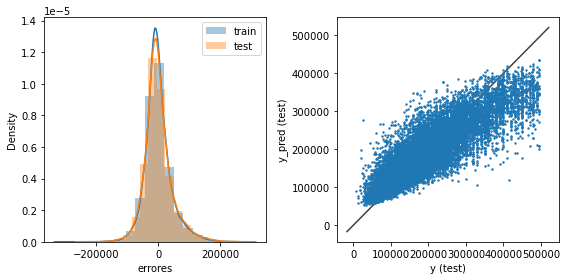

In [73]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_forest, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_forest, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_forest, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

In [74]:
nombre=['rmse_train_forestcv', 'rmse_test_forestcv']
valor = [rmse_train_forestcv,rmse_test_forestcv]

dicc= {'rmse':nombre,'value':valor}
errores_forestrancv = pd.DataFrame(dicc)
errores_forestrancv.to_csv('errores_forestrancv.csv', index = False)

- Con los hiperparametros encontrados con gridsearchcv, dejamos de tener overfitting y un Raíz del error cuadrático medio en Train: 42896.576457439856, y en Test: 44878.62050584381, superior al encontrado por default.

## 4- ENTRENAMOS UN MODELO REGRESOR XGBOOST

In [75]:
# Importamos la libreria
from xgboost import XGBRegressor

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [77]:
xgbr0 = XGBRegressor(random_state=5).fit(X_train,y_train)

In [78]:
y_train_pred = xgbr0.predict(X_train)
y_test_pred = xgbr0.predict(X_test)

In [79]:
rmse_train_xgbr0 = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_xgbr0 = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Raíz del error cuadrático medio en Train:',f'{rmse_train_xgbr0:,.0f}'.replace(',','.'))
print('Raíz del error cuadrático medio en Test:',f'{rmse_test_xgbr0:,.0f}'.replace(',','.'))

Raíz del error cuadrático medio en Train: 39.189
Raíz del error cuadrático medio en Test: 41.493


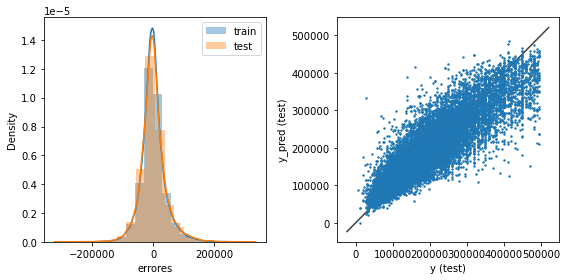

In [81]:
       
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [82]:
nombre=['rmse_train_xgbr0', 'rmse_test_xgbr0']
valor = [rmse_train_xgbr0,rmse_test_xgbr0]

dicc= {'rmse':nombre,'value':valor}
errores_xgbr0 = pd.DataFrame(dicc)
errores_xgbr0.to_csv('errores_xgbr0.csv', index = False)

In [83]:
xgbr0.feature_importances_

array([0.001406  , 0.00444394, 0.0595384 , 0.00458514, 0.02172911,
       0.00127343, 0.00871879, 0.01542896, 0.0058505 , 0.00195426,
       0.00344765, 0.00146236, 0.00131396, 0.00534322, 0.03813482,
       0.02214442, 0.09953079, 0.        , 0.00607487, 0.00846395,
       0.00543726, 0.01663702, 0.00184247, 0.02541481, 0.03834661,
       0.00308125, 0.00654948, 0.00252461, 0.00604218, 0.00040735,
       0.        , 0.00491657, 0.0016588 , 0.00651808, 0.01143633,
       0.00521429, 0.01162245, 0.00234747, 0.00160929, 0.00071296,
       0.00325102, 0.00931553, 0.00971983, 0.00064332, 0.0063079 ,
       0.00173332, 0.        , 0.00730383, 0.00169636, 0.01287937,
       0.00910974, 0.01872935, 0.00235546, 0.00839115, 0.00384939,
       0.        , 0.00608506, 0.0025206 , 0.00560245, 0.00163707,
       0.00293762, 0.00089921, 0.02203567, 0.00709311, 0.04372031,
       0.00528887, 0.00147165, 0.00360427, 0.00325708, 0.00459714,
       0.00314881, 0.00897085, 0.00665232, 0.00227948, 0.04899

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

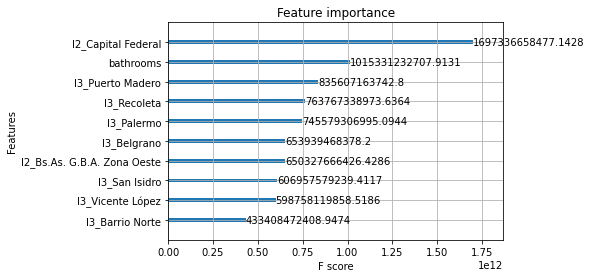

In [84]:
from xgboost import plot_importance
plot_importance(xgbr0,max_num_features=10, importance_type='gain')

### Analizamos el modelo XGBOOST optimizando hiperparametros con RandomizedSearchCV

In [ ]:
parameters = {  
              'objective':['reg:squarederror'],    # Objetivo de aprendizaje
              'eval_metric':['rmse'],              # Métrica para evaluar
              'max_depth': [3,5,10],               # Profundidad
              'subsample': [0.5, 0.8],             # % de submuestreo de instancias para evitar el overfiting
              'colsample_bytree': [0.5, 0.7],      # % de submuestro de features
              'learning_rate': [0.05, 0.07, 0.1],  # Tasa de aprendizaje
              'min_child_weight': [1,5, 10],   # Número mínimo de instancias necesarias para estar en cada nodo
             }

In [ ]:
xgbr = XGBRegressor(random_state=42)


In [ ]:
# Buscando el mejor hiperparametro con RandomizedSearchCV
folds = 3
param_comb = 5
random_search = RandomizedSearchCV(xgbr, param_distributions=parameters, n_iter=param_comb, n_jobs=-1, 
                                  cv=5, random_state=10 )
# medimos el tiempo de ejecucion
#start_time = timer(None) 
#random_search.fit(X_train,y_train)
#timer(start_time)


 Time taken: 0 hours 5 minutes and 50.74 seconds.


In [ ]:
print('\n mejor estimador:')
print(random_search.best_estimator_)
print('\n La mejor puntuación de gini normalizada para búsquedas de% d veces con% d combinaciones de parámetros:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n mejor hiperparametro:')
print(random_search.best_params_)


 mejor estimador:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.07, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=0.8, tree_method='exact',
             validate_parameters=1, verbosity=None)

 La mejor puntuación de gini normalizada para búsquedas de 3 veces con 5 combinaciones de parámetros:
0.6054164658428245

 mejor hiperparametro:
{'subsample': 0.8, 'objective': 'reg:squarederror', 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.07, 'eval_metric': 'rmse', 'colsample_bytree': 0.7}


In [85]:
# aplico el modelo con los hiperparametros encontrados
xgbr = XGBRegressor(objective= 'reg:squarederror', colsample_bytree=0.7, eval_metric = 'rmse', learning_rate= 0.07, 
                    max_depth= 10, min_child_weight=1, subsample=0.8, random_state=42).fit(X_train,y_train)

In [86]:
y_train_pred = xgbr.predict(X_train)
y_test_pred = xgbr.predict(X_test)

In [87]:
rmse_train_xgbr = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_xgbr = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('Raíz del error cuadrático medio en Train:',f'{rmse_train_xgbr:,.0f}'.replace(',','.'))
print('Raíz del error cuadrático medio en Test:',f'{rmse_test_xgbr:,.0f}'.replace(',','.'))

Raíz del error cuadrático medio en Train: 37.989
Raíz del error cuadrático medio en Test: 40.829


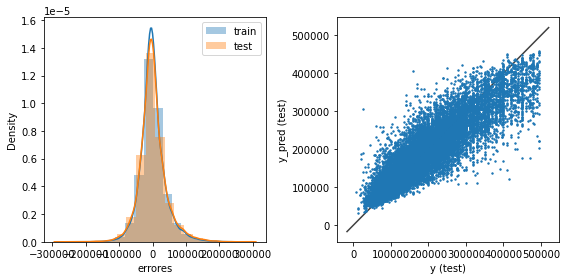

In [89]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

In [90]:
nombre=['rmse_train_xgbr', 'rmse_test_xgbr']
valor = [rmse_train_xgbr,rmse_test_xgbr]

dicc= {'rmse':nombre,'value':valor}
errores_xgbr = pd.DataFrame(dicc)
errores_xgbr.to_csv('errores_xgbr.csv', index = False)

Mejoro un poco respecto al modelo con hiperparametros por default.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

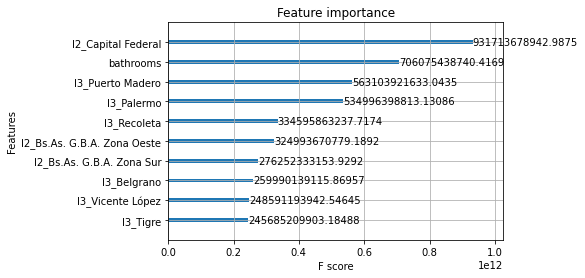

In [91]:
from xgboost import plot_importance
plot_importance(xgbr,max_num_features=10, importance_type='gain')

las diez variables mas importantes segun el modelo.

# 6. INTERPRETACION DE MODELOS

A lo largo del proyecto fuimos transformamos los datos, es muy importante ya que los mismos no son de buena calidad. Considero que el proyecto deberia dividirse para tratarse por ubicacion de los inmuebles del dataset y por cada tipo, ya que se podria obtener resultados mas precisos. Ademas considero que aunque se mejoro mucho los errores cuadraticos medios RMSE, en comparacion con el sprint 1, creo que todavia es muy elevado. Tal vez por los datos que son llenados con muchos errores, o tal vez por no contar con mas herramientas como procesamiento de lenguaje natural para advertir los valores que podrian aumentar o disminuir el valor de las propiedades.


---


Los modelos que entrenamos de Regresión Lineal, Árboles de Decisión y KNN: fueron entrenados con los datos transformados al eliminar los outliers, tratando los valores faltantes, se procedio al escalados de los mismos, se produjo el enconding de las variables categoricas a fin de tenerlas en cuenta y ademas se redujo la dimensionalidad con PCA, tratandola por separado. 

Siendo los arboles de decision los que arrojaron el mejor performance, ya que KNN tiene menor error pero se encuentra overfitteado.
Regresión Lineal con Polinomial Features: Se entrenaron regresiones lineales aplicando polinomial features de grado 2 sobre el dataset transformado, aumentando la cantidad de variables a tener en cuenta lo que resulta en un modelo extremadamente flexible y muy overfitteado, por lo que descarto tenerlo en cuenta a efectos de su medicion sin aplicacion de regularizacion

Al aplicar la regularización con Ridge y Lasso esperando la eliminación de variables irrelevantes, se obtuvo un mejor desempeño al regularizar las variables poco importantes.
Random Forest: Se entrenaron los modelos con sus hiperparametros por defecto arrojando un buen resultado, ademas visualizamos las importancias de cada feature en el mismo. Para obtener una mejor performance del mismo se utilizo RANDOM SEARCH CV Y GRID SEARCH CV, para obtener los hiperparametros optimizados y utilizarlos en la confeccion del modelo, lo que mejora pero no lo suficiente como para utilizar tantos recursos computacionales.
Para los últimos, las variables más rankeadas fueron: surface_covered, bathrooms, surface_total, l3_CapitalFederal, propertytype.
XGBosst Regressor: con respecto a este modelo es mas rapido de entrenar y utilizamos el mismo entrenando sus variables por defecto y con optimizacion del mismo por RANDOM SEARCH CV, obteniendo un buen performance, igual no muy sobresaliente del random forest. Lo curioso es que las features mas importantes fueron otras ya que tuvo en cuenta las ubicaciones de los inmuebles y bathrooms.

---

# 7. COMPARACION DE MODELOS

In [118]:
nombre=['rmse_train_tree', 'rmse_train_tree', 'rmse_train_knn', 'rmse_test_knn', 'rmse_train_PCA', 'rmse_test_PCA', 'rmse_train_pridge', 'rmse_train_plasso',
        'rmse_train_forest', 'rmse_train_forestran', 'rmse_train_forestcv', 'rmse_train_xgbr0','rmse_train_xgbr']
valor = [rmse_train_tree, rmse_train_tree, rmse_train_knn, rmse_test_knn, rmse_train_PCA, rmse_test_PCA, rmse_train_pridge, rmse_train_plasso,
        rmse_train_forest, rmse_train_forestran, rmse_train_forestcv, rmse_train_xgbr0,rmse_train_xgbr]

dicc= {'rmse':nombre,'value':valor}
errores_totales = pd.DataFrame(dicc)
errores_totales.to_csv('errores_totales.csv', index = False)

In [119]:
errores = {
    'Modelos': ['ARBOL', 'KNN', 'Reg lineal PCA', 'poly ridge', 'poly lasso', 'RANDOM FOREST_d', 'RANDOM FOREST_rand','RANDOM FOREST CV', 'XGB-D', 'XGB-RV'],
    
    'RMSE_TRAIN': [rmse_train_tree.mean(), rmse_train_knn.mean(), rmse_train_PCA.mean(), rmse_train_pridge.mean(), rmse_train_plasso.mean(),
                  rmse_train_forest.mean(),rmse_train_forestran.mean(), rmse_train_forestcv.mean(), rmse_train_xgbr0.mean(),rmse_train_xgbr.mean()],
    
    'RMSE_TEST': [rmse_test_tree.mean(), rmse_test_knn.mean(), rmse_test_PCA.mean(), rmse_test_pridge.mean(), rmse_test_plasso.mean(),
                  rmse_test_forest.mean(),rmse_test_forestran.mean(), rmse_test_forestcv.mean(), rmse_test_xgbr0.mean(),rmse_test_xgbr.mean()],

    
    'RATIO TRAIN vs TEST': [(rmse_train_tree.mean()/rmse_test_tree.mean()), (rmse_train_knn.mean()/rmse_test_knn.mean()), (rmse_train_PCA.mean()/rmse_test_PCA.mean()),
                          (rmse_train_pridge.mean()/rmse_test_pridge.mean()), (rmse_train_plasso.mean()/rmse_test_plasso.mean()),
                           (rmse_train_forest.mean()/rmse_test_forest.mean()), (rmse_train_forestran.mean()/rmse_test_forestran.mean()),(rmse_test_forestcv.mean()/rmse_train_forestcv.mean()),(rmse_train_xgbr0.mean()/rmse_test_xgbr0.mean()),
                           (rmse_train_xgbr.mean()/rmse_test_xgbr.mean())]
}

tabla_errores = pd.DataFrame(errores, columns = ['Modelos', 'RMSE_TRAIN', 'RMSE_TEST','RATIO TRAIN vs TEST'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ARBOL'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Reg lineal PCA'),
  Text(3, 0, 'poly ridge'),
  Text(4, 0, 'poly lasso'),
  Text(5, 0, 'RANDOM FOREST_d'),
  Text(6, 0, 'RANDOM FOREST_rand'),
  Text(7, 0, 'RANDOM FOREST CV'),
  Text(8, 0, 'XGB-D'),
  Text(9, 0, 'XGB-RV')])

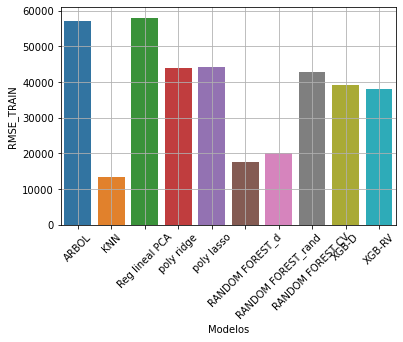

In [120]:
sns.barplot(x = 'Modelos', y = 'RMSE_TRAIN', data = tabla_errores)
plt.grid('y')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ARBOL'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Reg lineal PCA'),
  Text(3, 0, 'poly ridge'),
  Text(4, 0, 'poly lasso'),
  Text(5, 0, 'RANDOM FOREST_d'),
  Text(6, 0, 'RANDOM FOREST_rand'),
  Text(7, 0, 'RANDOM FOREST CV'),
  Text(8, 0, 'XGB-D'),
  Text(9, 0, 'XGB-RV')])

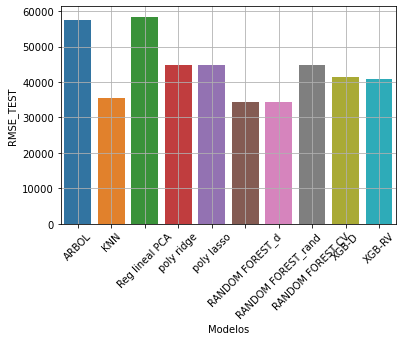

In [121]:
sns.barplot(x = 'Modelos', y = 'RMSE_TEST', data = tabla_errores)
plt.grid('y')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ARBOL'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Reg lineal PCA'),
  Text(3, 0, 'poly ridge'),
  Text(4, 0, 'poly lasso'),
  Text(5, 0, 'RANDOM FOREST_d'),
  Text(6, 0, 'RANDOM FOREST_rand'),
  Text(7, 0, 'RANDOM FOREST CV'),
  Text(8, 0, 'XGB-D'),
  Text(9, 0, 'XGB-RV')])

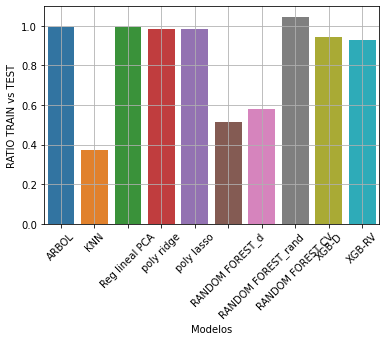

In [122]:
sns.barplot(x = 'Modelos', y = 'RATIO TRAIN vs TEST', data = tabla_errores)
plt.grid('y')
plt.xticks(rotation = 45)

- El modelo de random forest con optimizacion de hiperparametros con random search cv, funciona bastante bien al no estar overfitteado y obteniendo una buen performance, ademas de su menor consumo de recursos computacionales comparados con grid search cv. 

Concluyo que los resultados en este trabajo son procedentes teniendo en cuenta la calidad de los datos y las variables disponibles.